<a href="https://colab.research.google.com/github/angelaguzmanar/pruebaclase/blob/main/EntregaRH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar librerias

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 34.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
import joblib
from sklearn.compose import ColumnTransformer

In [ ]:
#conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ANGELA
dfgeneral_data=pd.read_csv('/content/drive/MyDrive/Analitica3/EntregaRH/general_data.csv', sep =';')
dfemployee_survey_data = pd.read_csv('/content/drive/MyDrive/Analitica3/EntregaRH/employee_survey_data.csv')
dfmanager_survey_data = pd.read_csv('/content/drive/MyDrive/Analitica3/EntregaRH/manager_survey_data.csv')
dfin_time = pd.read_csv('/content/drive/MyDrive/Analitica3/EntregaRH/in_time.csv')
dfout_time = pd.read_csv('/content/drive/MyDrive/Analitica3/EntregaRH/in_time.csv')
dfretirement_info = pd.read_csv('/content/drive/MyDrive/Analitica3/EntregaRH/retirement_info.csv', sep =';')

In [ ]:
#ANDREA
dfgeneral_data=pd.read_csv('/content/drive/MyDrive/analitica 3 /DatosEntregaRRHH/general_data (1).csv', sep =';')
dfemployee_survey_data = pd.read_csv('/content/drive/MyDrive/analitica 3 /DatosEntregaRRHH/employee_survey_data (1).csv')
dfmanager_survey_data = pd.read_csv('/content/drive/MyDrive/analitica 3 /DatosEntregaRRHH/manager_survey_data (1).csv')
dfin_time = pd.read_csv('/content/drive/MyDrive/analitica 3 /DatosEntregaRRHH/in_time.csv')
dfout_time = pd.read_csv('/content/drive/MyDrive/analitica 3 /DatosEntregaRRHH/out_time.csv')
dfretirement_info = pd.read_csv('/content/drive/MyDrive/analitica 3 /DatosEntregaRRHH/retirement_info.csv', sep =';')

## Preparación bases de datos

In [ ]:
#Primero analizaremos la cantidad de datos nulos que tienen las bases para proceder a tratarlos

In [ ]:
dfgeneral_data.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
dfemployee_survey_data.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [ ]:
dfmanager_survey_data.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [ ]:
dfretirement_info.isnull().sum()

EmployeeID            0
Attrition             0
retirementDate        0
retirementType        0
resignationReason    70
dtype: int64

In [ ]:
#Aca marcamos los datos nulos en  resignationReason  como NR
dfretirement_info['resignationReason'].fillna('NR', inplace=True)
print(dfretirement_info['resignationReason'].isnull().sum())
print(dfretirement_info['resignationReason'].unique())

0
['Others' 'Stress' 'Salary' 'NR']


In [ ]:
#Procedemos a unir las tablas para que sean mas facil de trabajar
dftotal=dfgeneral_data.merge(dfemployee_survey_data, on="EmployeeID", how="left")
dftotal.shape

(4410, 26)

In [ ]:
dftotal=dftotal.merge(dfmanager_survey_data, on="EmployeeID", how="left")
dftotal.shape

(4410, 28)

In [ ]:
dfdata=dftotal.merge(dfretirement_info, on="EmployeeID", how="left")
dfdata.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,0,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,4,3.0,2.0,4.0,2,4,Yes,15/10/2016,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,3,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,5,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN


In [ ]:
dfdata.shape

(4410, 32)

In [ ]:
for columna in dfdata.columns[:]:
  print('\n {}'.format(columna))
  print(dfdata[columna].unique()) #Employeecount es una columna irrelevante, over18, standardhours


 Age
[51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]

 BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

 Department
['Sales' 'Research & Development' 'Human Resources']

 DistanceFromHome
[ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]

 Education
[2 1 4 5 3]

 EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

 EmployeeCount
[1]

 EmployeeID
[   1    2    3 ... 4408 4409 4410]

 Gender
['Female' 'Male']

 JobLevel
[1 4 3 2 5]

 JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

 MaritalStatus
['Married' 'Single' 'Divorced']

 MonthlyIncome
[131160  41890 193280 ...  37020  23980  54680]

 NumCompaniesWorked
[ 1.  0.  3.  4.  2.  7.  9.  5.  6.  8

In [ ]:
# Porcentaje de nulos que presenta nuetra base de datos
round(dftotal.isnull().sum().sum()/dftotal.size, 4)*100

0.09

In [ ]:
#Como observamos el porcentaje de nulos es 0.1% del total de datos, por lo que no son tan significativos, entonces aprovecharemos
#que se encuentran en varibales con respuestas numericas para imputarlos con el promedio,la moda y la media:
median_NumCompaniesWorked=round(dfdata['NumCompaniesWorked'].median())
print(median_NumCompaniesWorked)
dfdata['NumCompaniesWorked']=dfdata['NumCompaniesWorked'].fillna(median_NumCompaniesWorked)
print(dfdata['NumCompaniesWorked'].isnull().sum())
print(dfdata['NumCompaniesWorked'].unique())

2
0
[1. 0. 3. 4. 2. 7. 9. 5. 6. 8.]


In [ ]:
mode_EnvironmentSatisfaction = dfdata['EnvironmentSatisfaction'].mode()
print(mode_EnvironmentSatisfaction)
dfdata['EnvironmentSatisfaction'].fillna(mode_EnvironmentSatisfaction[0], inplace=True)
print(dfdata['EnvironmentSatisfaction'].isnull().sum())
print(dfdata['EnvironmentSatisfaction'].unique())

0    3.0
Name: EnvironmentSatisfaction, dtype: float64
0
[3. 2. 4. 1.]


In [ ]:
median_TotalWorkingYears=round(dfdata['TotalWorkingYears'].median())
print(median_TotalWorkingYears)
dfdata['TotalWorkingYears']=dfdata['TotalWorkingYears'].fillna(median_NumCompaniesWorked)
print(dfdata['TotalWorkingYears'].isnull().sum())
print(dfdata['TotalWorkingYears'].unique())

10
0
[ 1.  6.  5. 13.  9. 28. 10. 21. 16. 37.  7.  3. 15.  8.  2. 12. 17. 19.
 22.  4. 23.  0. 11. 24. 25. 20. 14. 26. 18. 30. 36. 31. 33. 32. 34. 40.
 29. 35. 27. 38.]


In [ ]:
mode_WorkLifeBalance = dfdata['WorkLifeBalance'].mode()
print(mode_WorkLifeBalance)
dfdata['WorkLifeBalance'].fillna(mode_WorkLifeBalance[0], inplace=True)
print(dfdata['WorkLifeBalance'].isnull().sum())
print(dfdata['WorkLifeBalance'].unique())

0    3.0
Name: WorkLifeBalance, dtype: float64
0
[2. 4. 1. 3.]


In [ ]:
mode_JobSatisfaction = dfdata['JobSatisfaction'].mode()
print(mode_JobSatisfaction)
dfdata['JobSatisfaction'].fillna(mode_JobSatisfaction[0], inplace=True)
print(dfdata['JobSatisfaction'].isnull().sum())
print(dfdata['JobSatisfaction'].unique())

0    4.0
Name: JobSatisfaction, dtype: float64
0
[4. 2. 1. 3.]


In [ ]:
dfdata['Attrition'].fillna('No', inplace=True)
print(dfdata['Attrition'].isnull().sum())
print(dfdata['Attrition'].unique())

0
['No' 'Yes']


In [ ]:
#Obervamos que los nulos si hayan sido imputados
dfdata.isnull().sum()

Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
Over18                        0
PercentSalaryHike             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
EnvironmentSatisfaction       0
JobSatisfaction               0
WorkLifeBalance               0
JobInvolvement                0
PerformanceRating             0
Attrition                     0
retirementDate             3699
retirementType             3699
resignat

In [ ]:
borrar=['EmployeeCount','Over18','StandardHours'] #Columnas no significativas
dfdata.drop(columns=borrar,inplace=True)

##Analisis Exploratorio

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.1


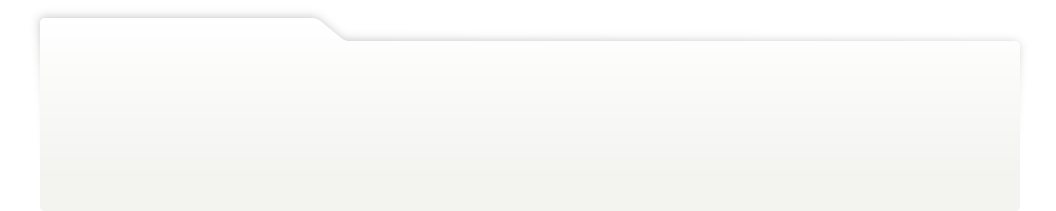
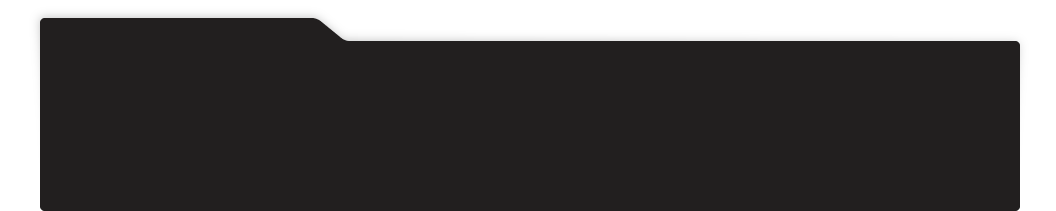
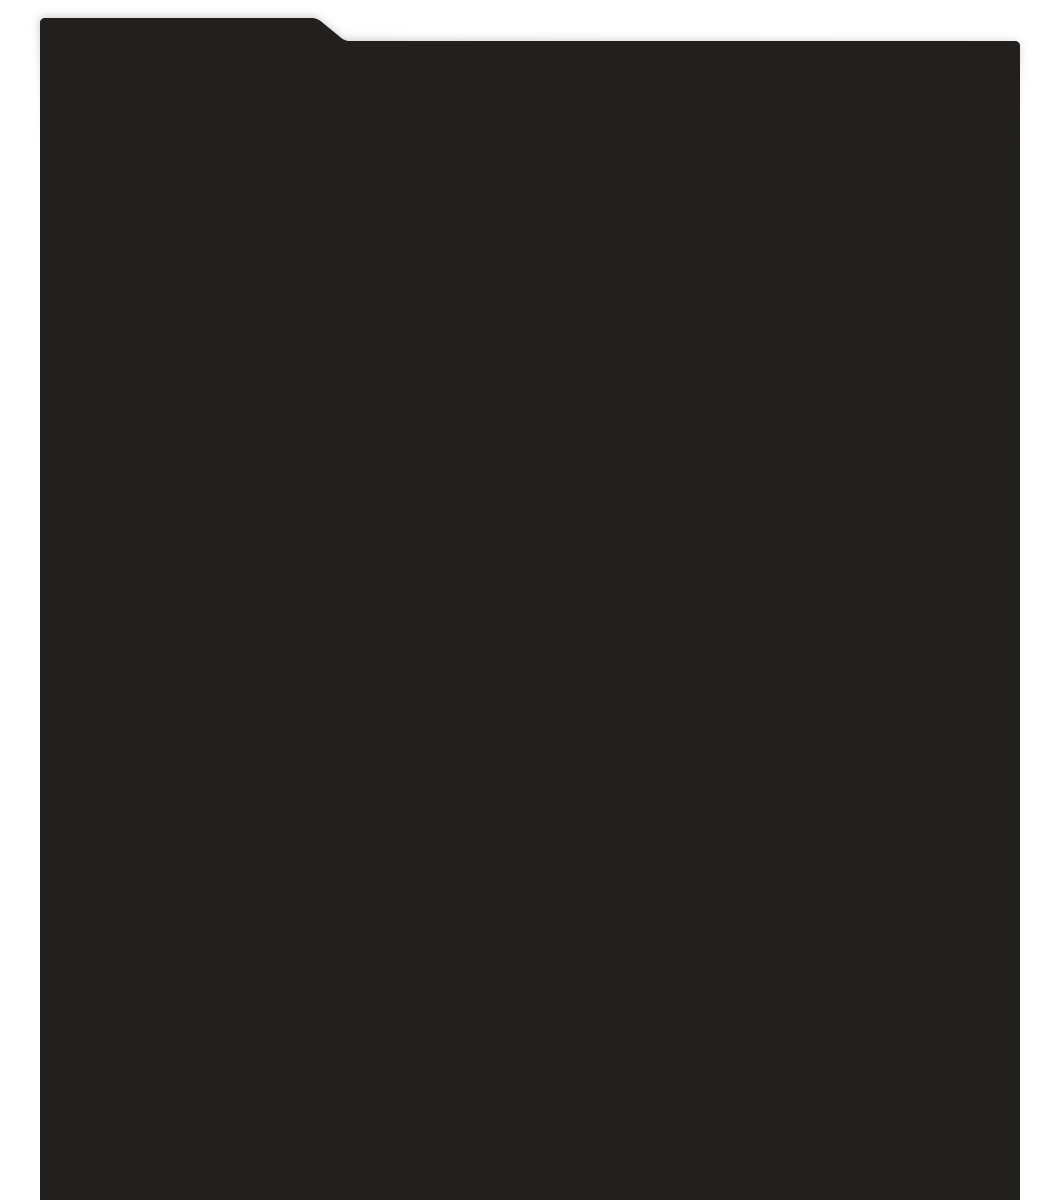
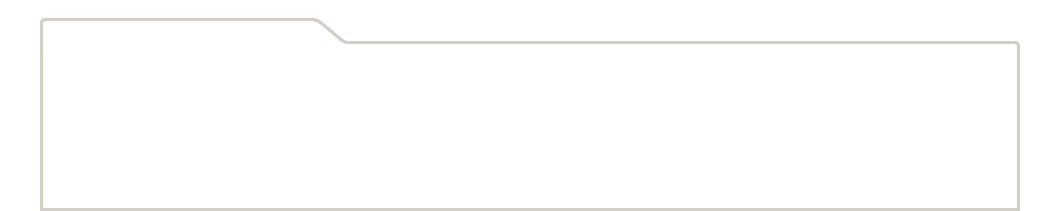
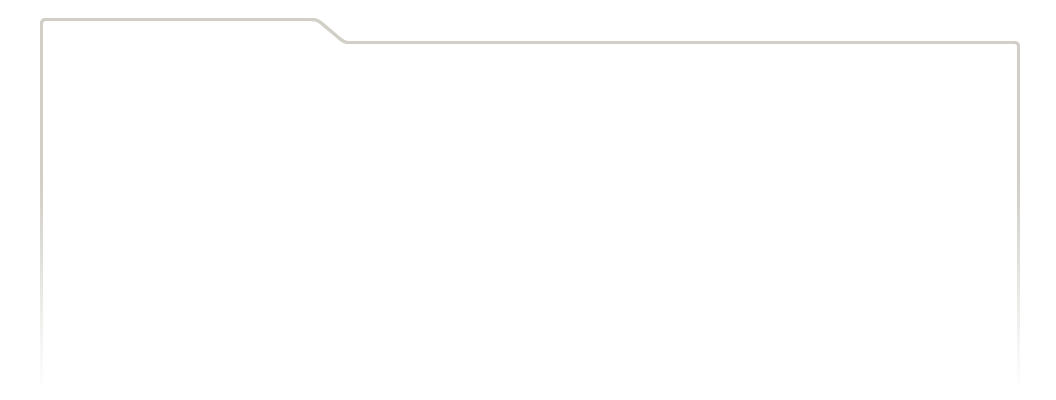
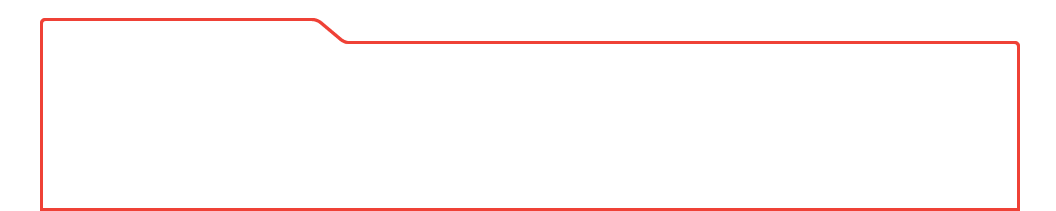
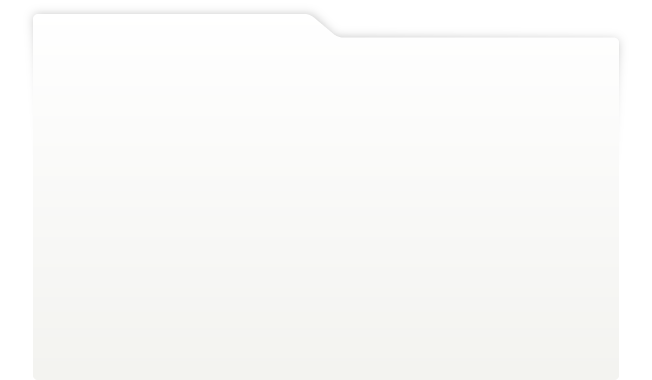
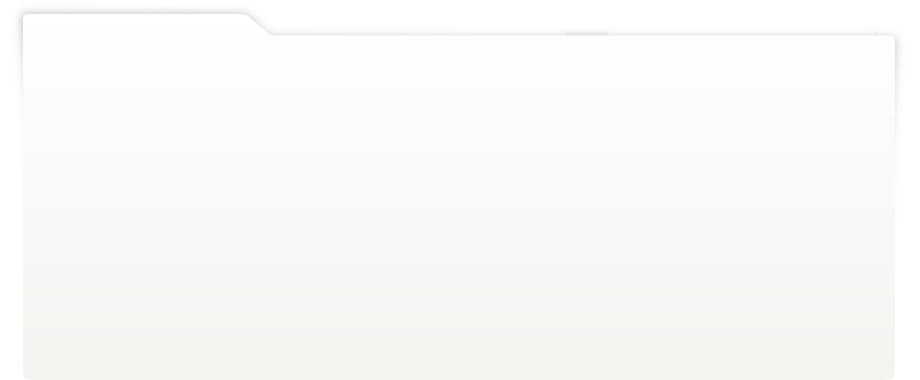
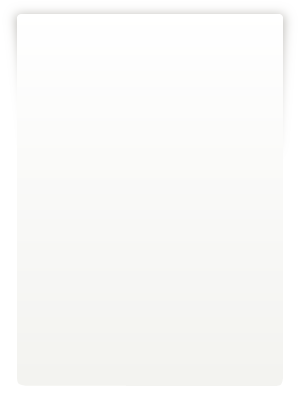
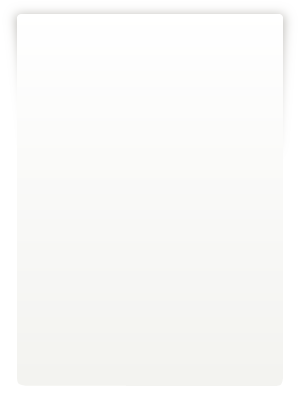
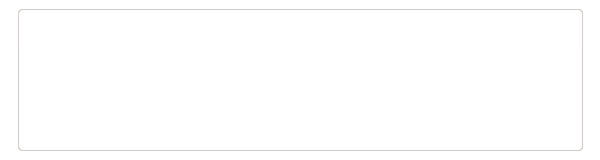
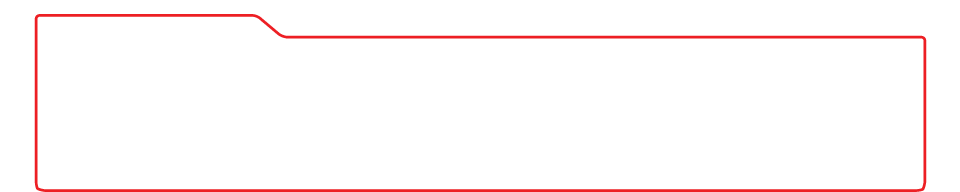
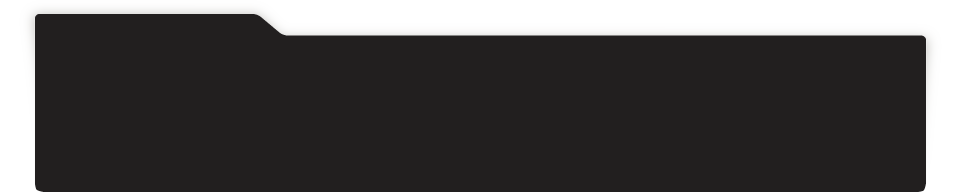
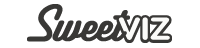
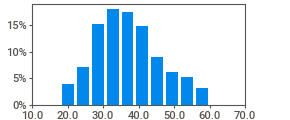
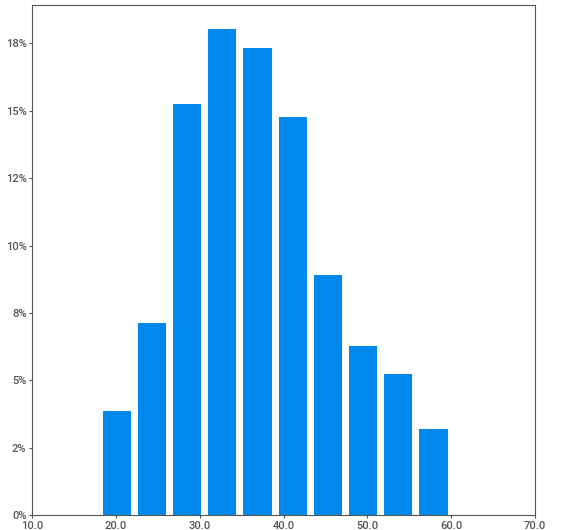
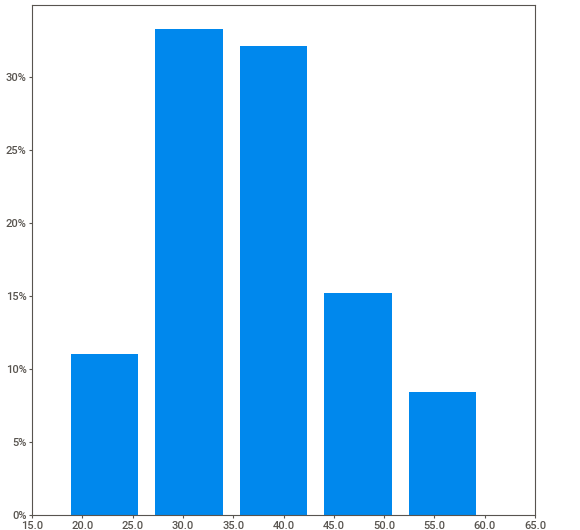
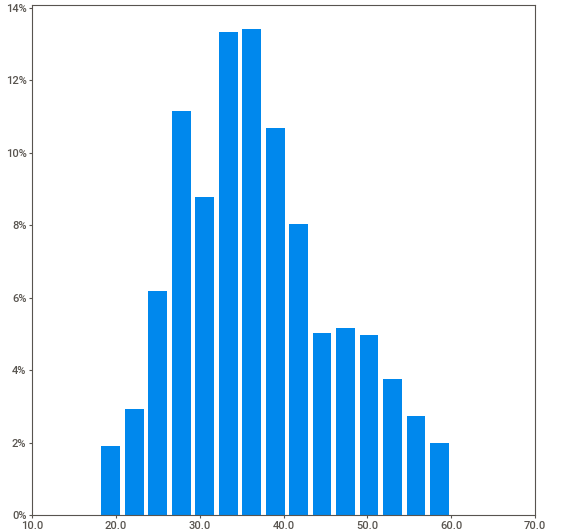
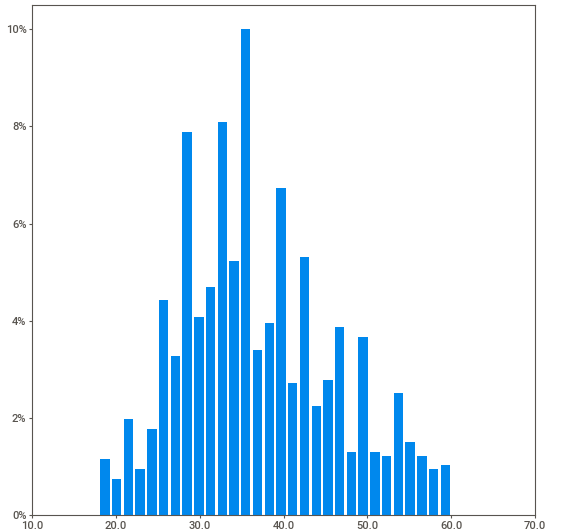
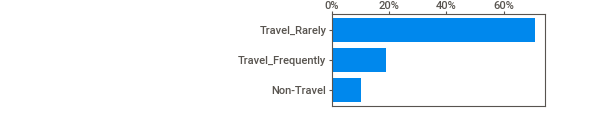
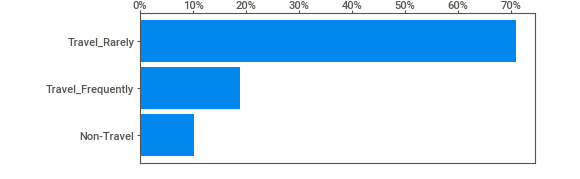
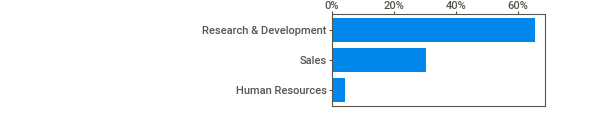
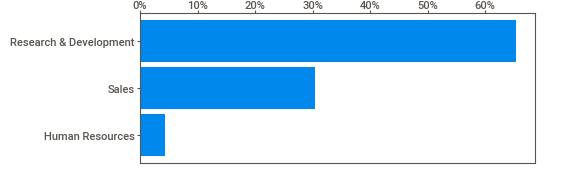
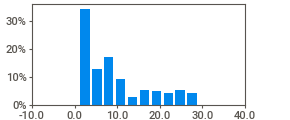
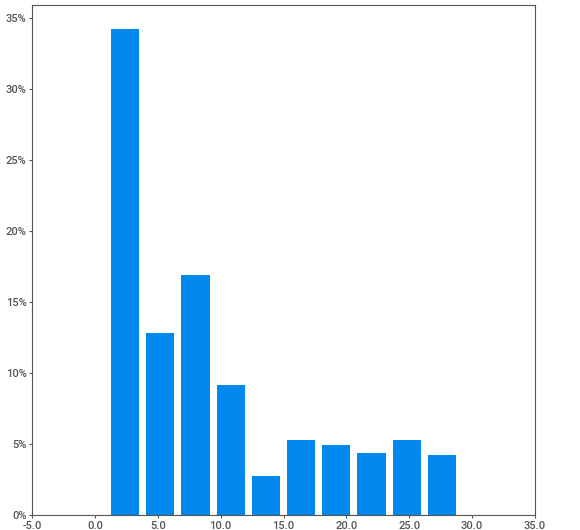
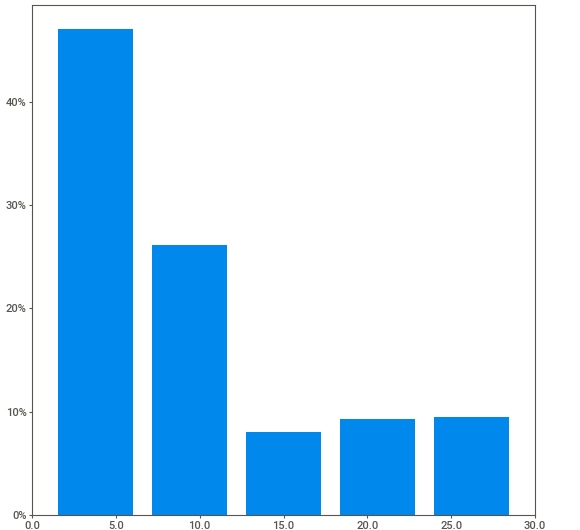
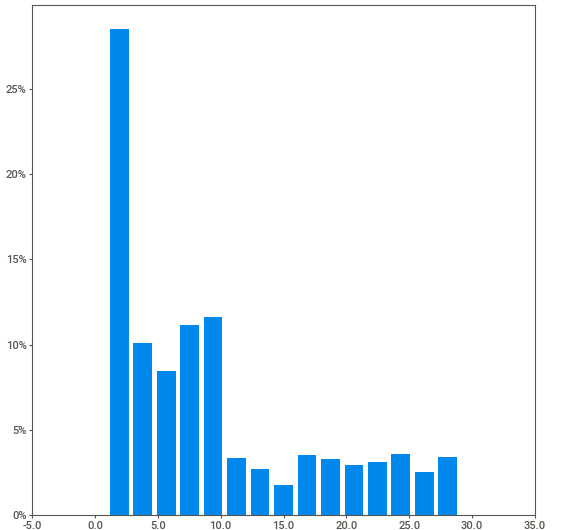
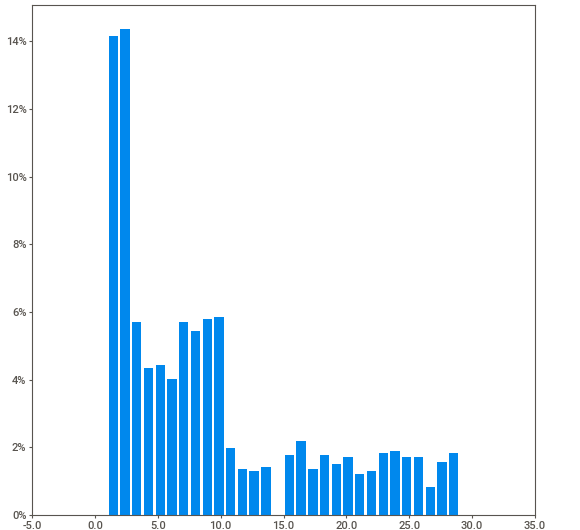
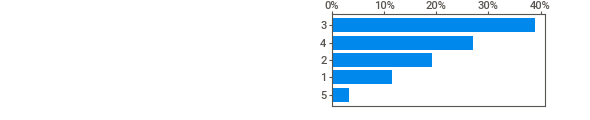
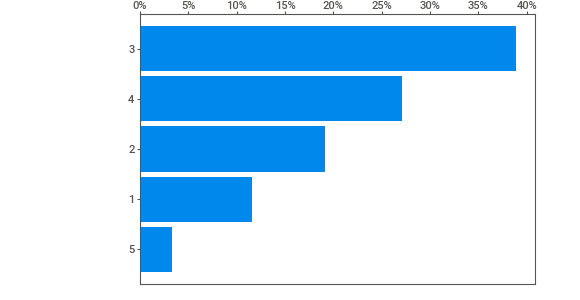
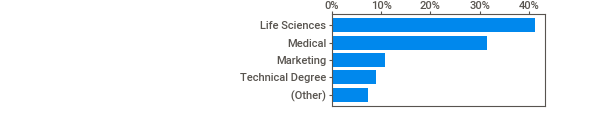
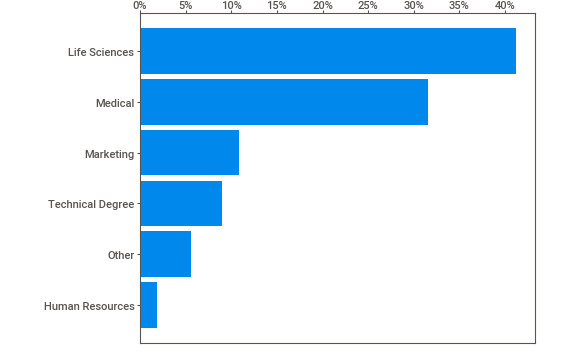
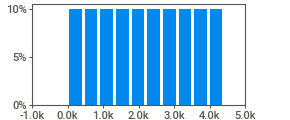
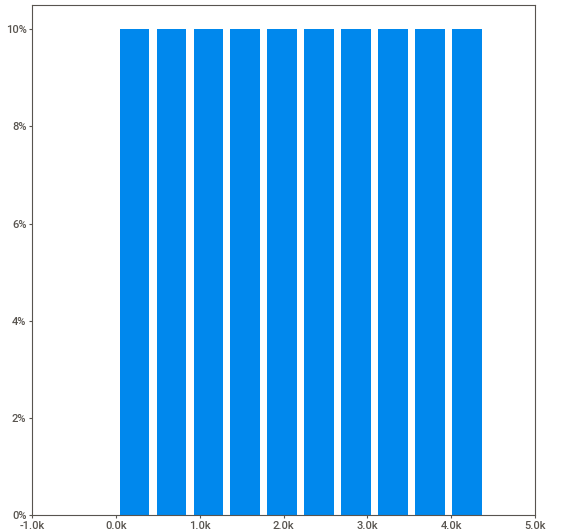
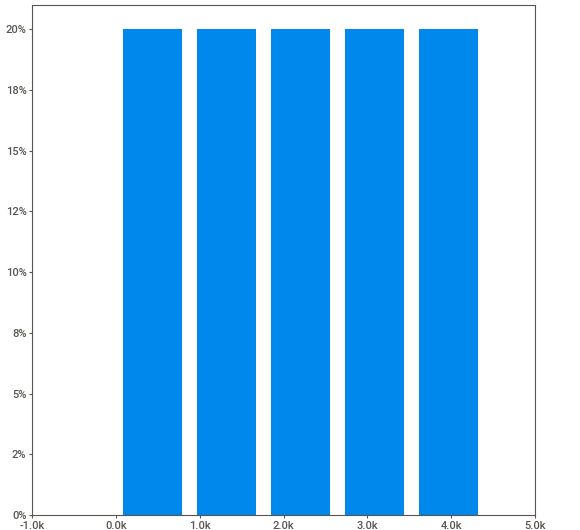
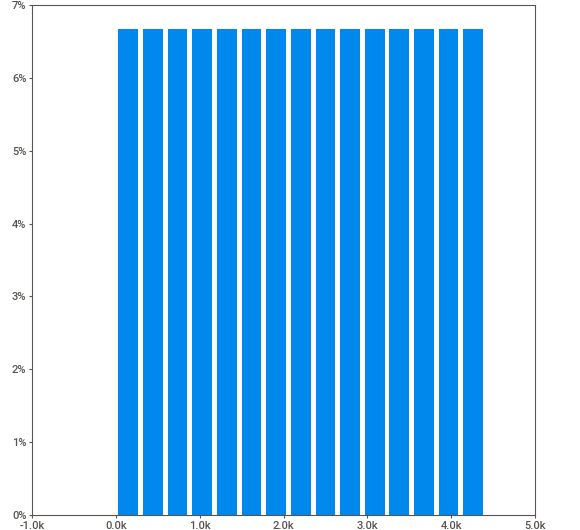
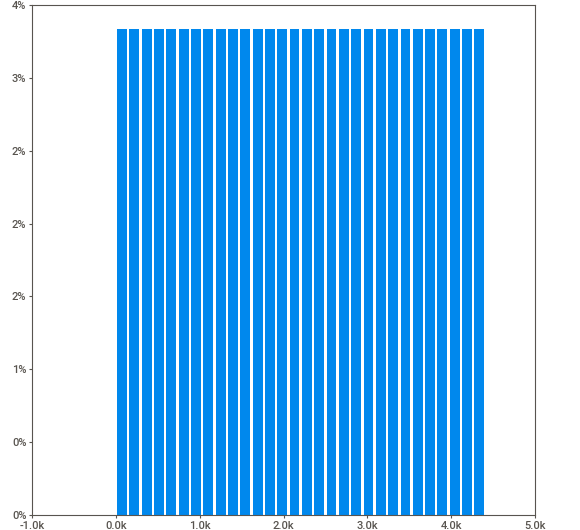
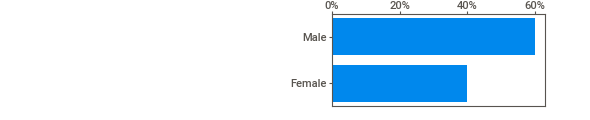
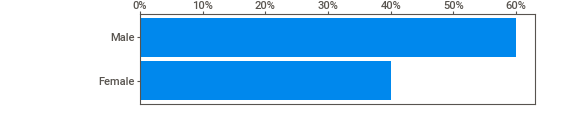
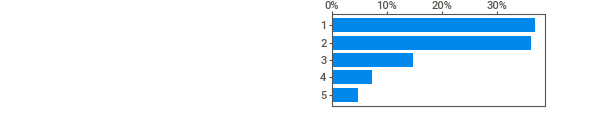
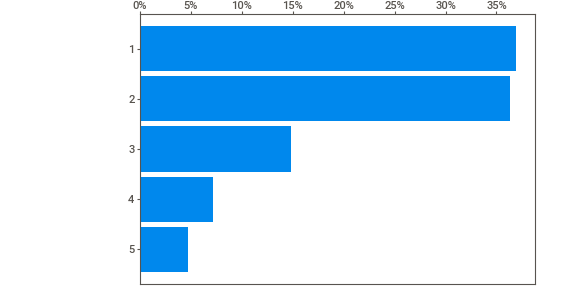
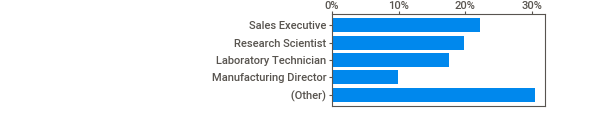
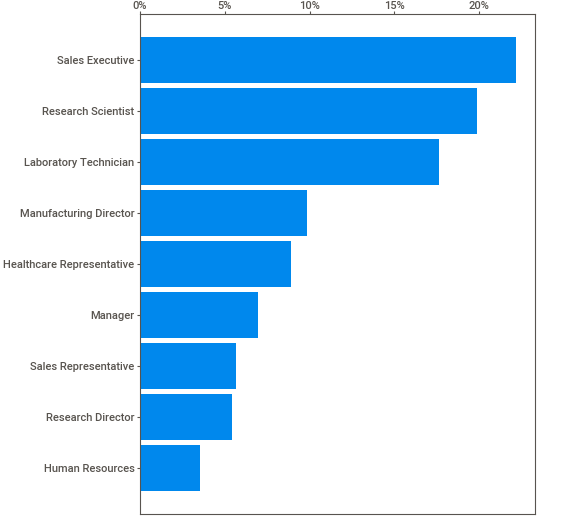
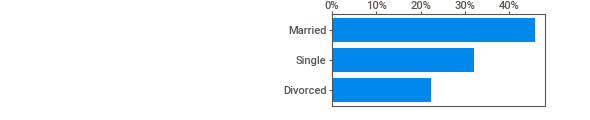
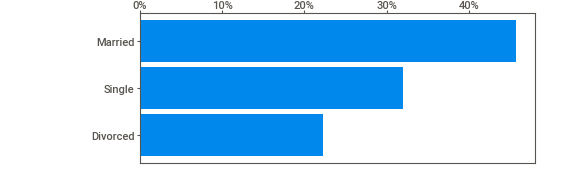
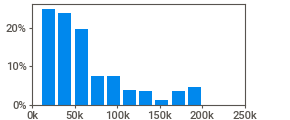
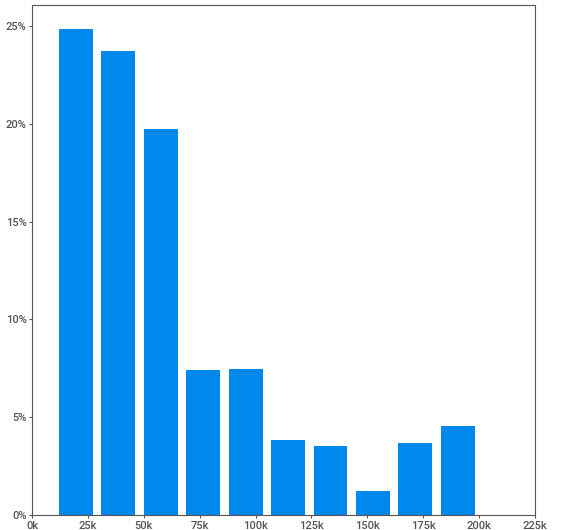
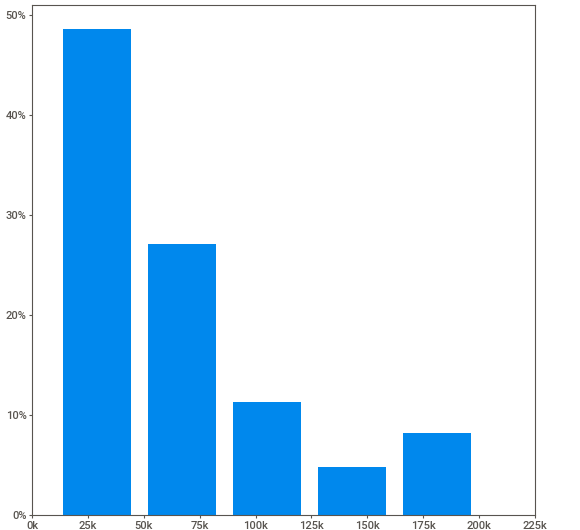
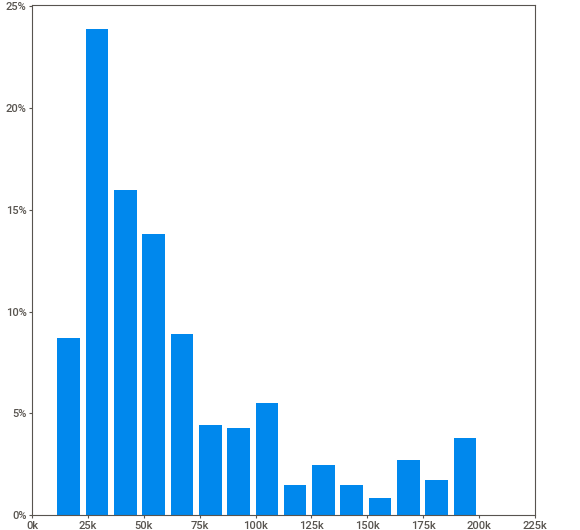
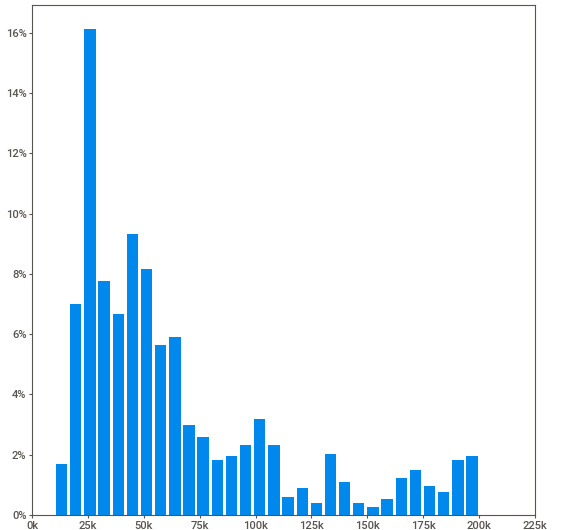
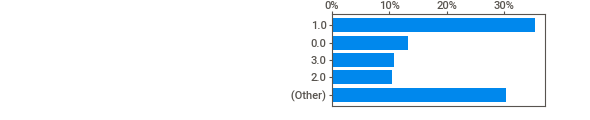
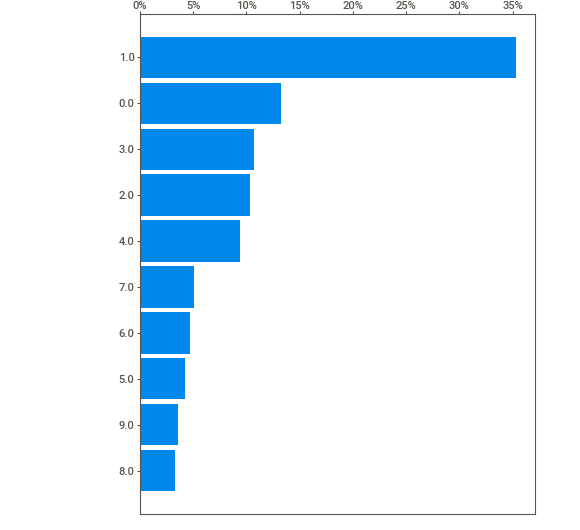
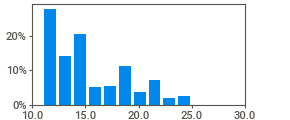
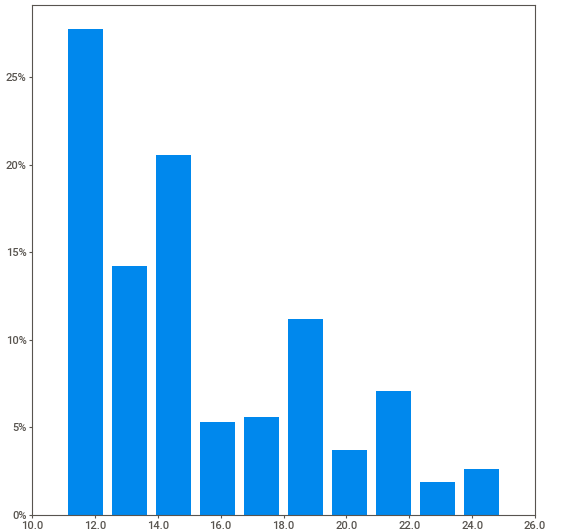
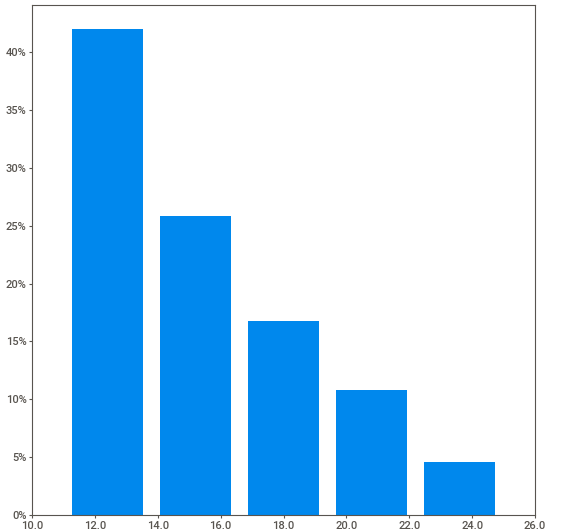
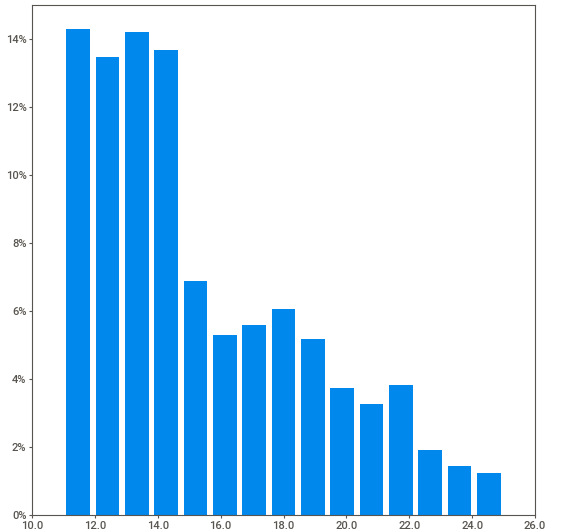
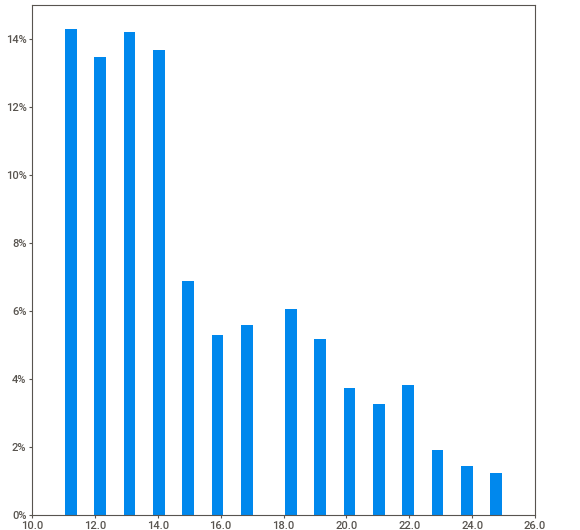
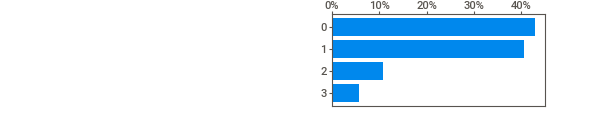
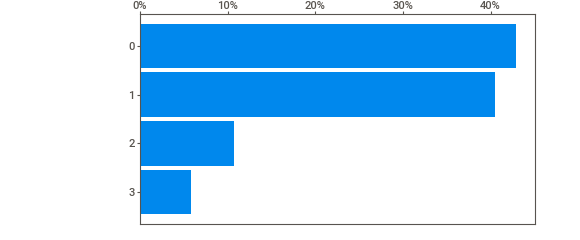
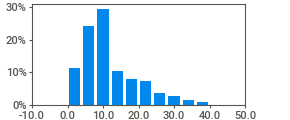
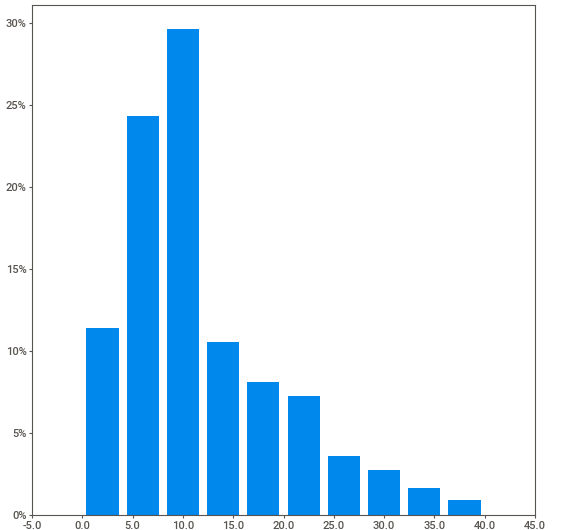
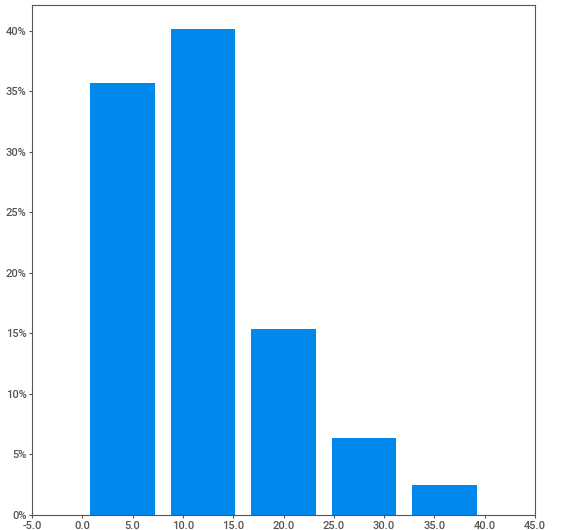
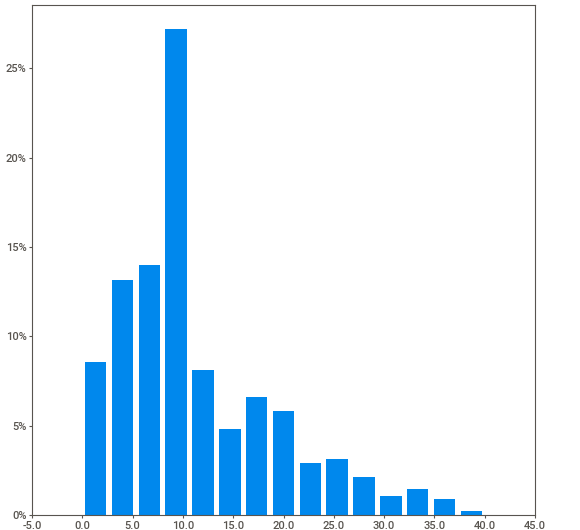
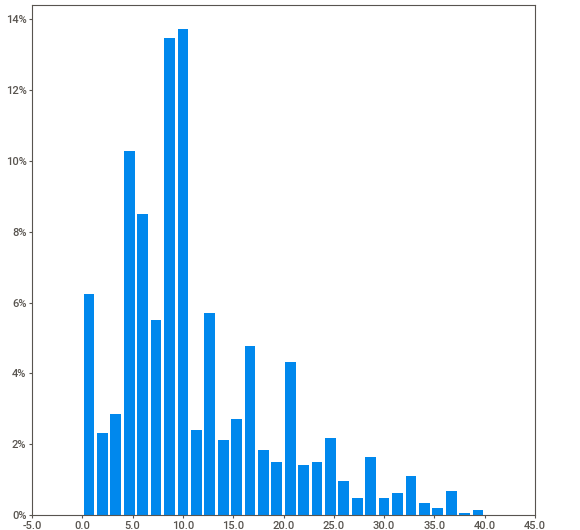
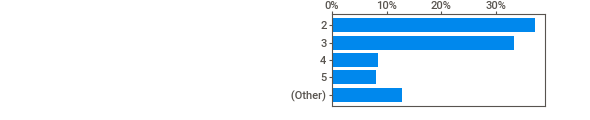
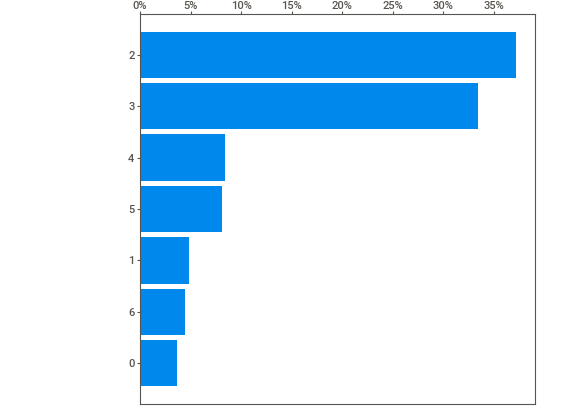
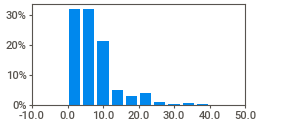
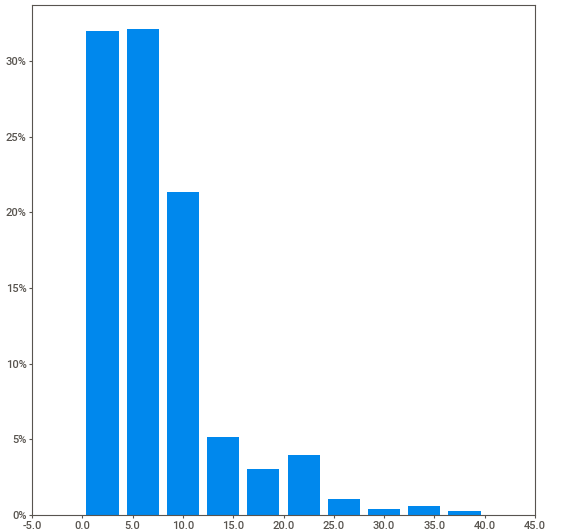
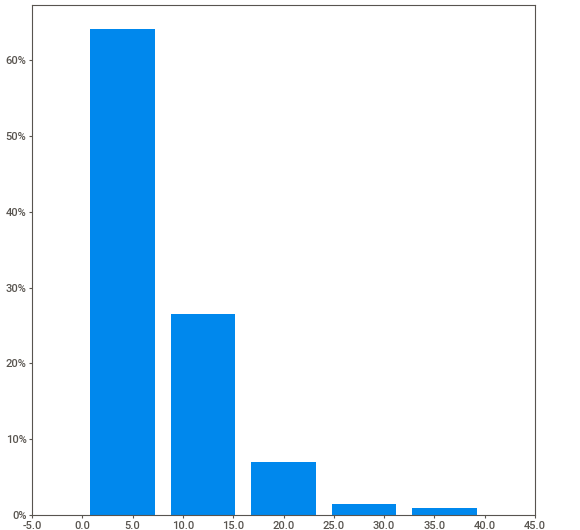
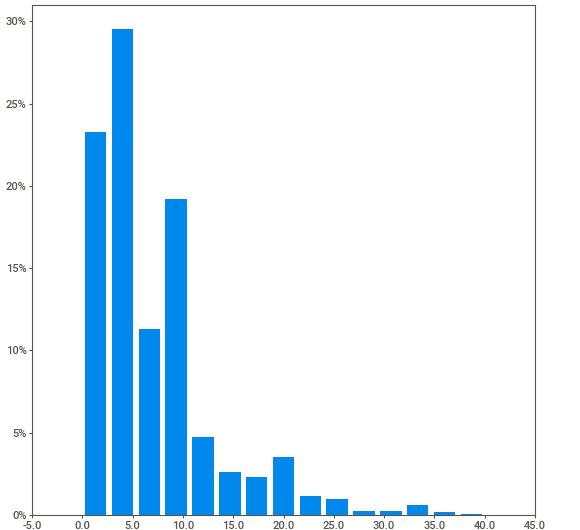
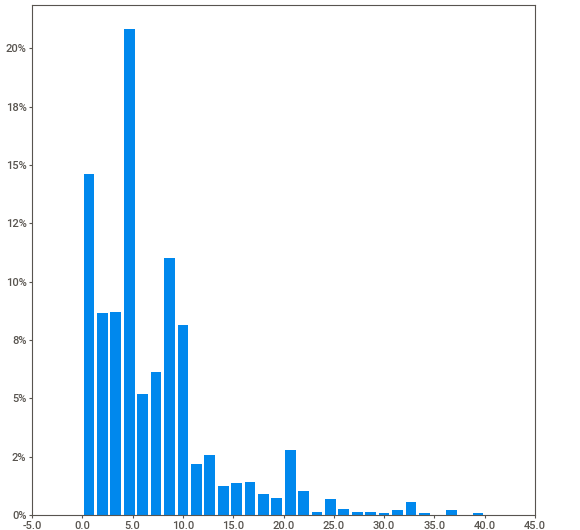
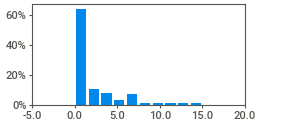
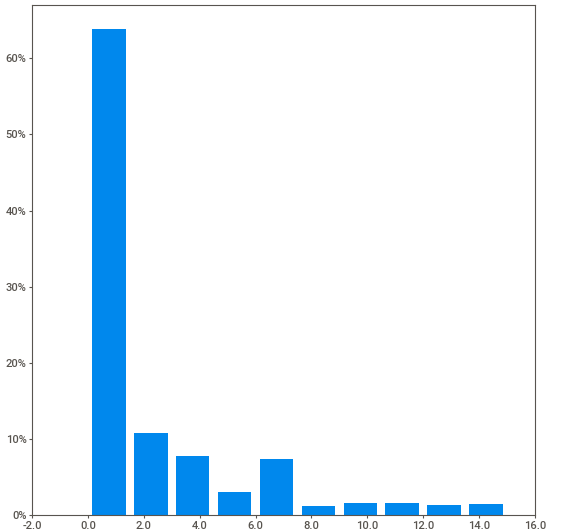
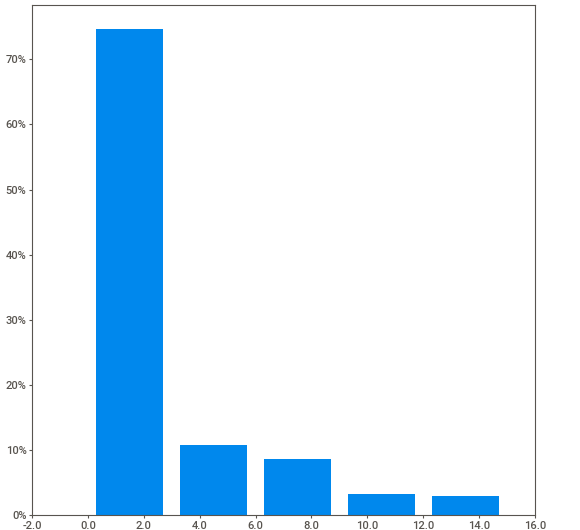
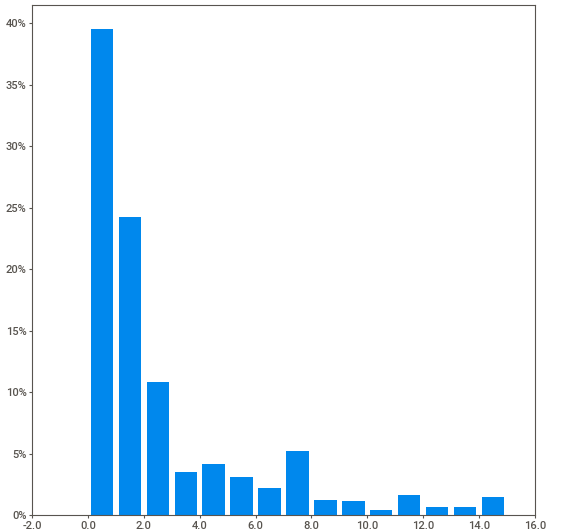
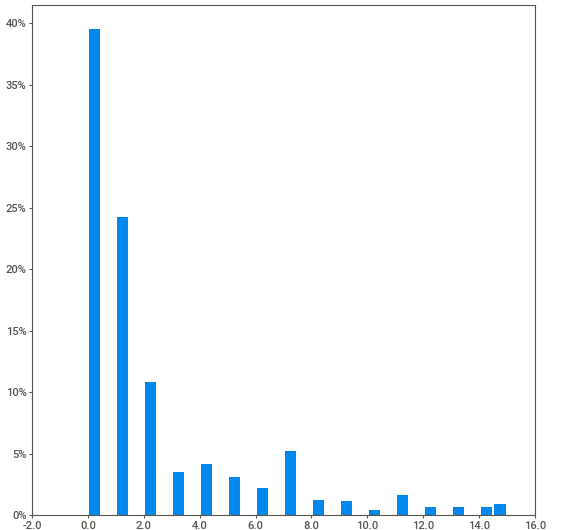
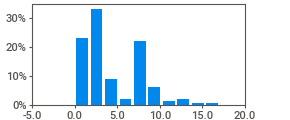
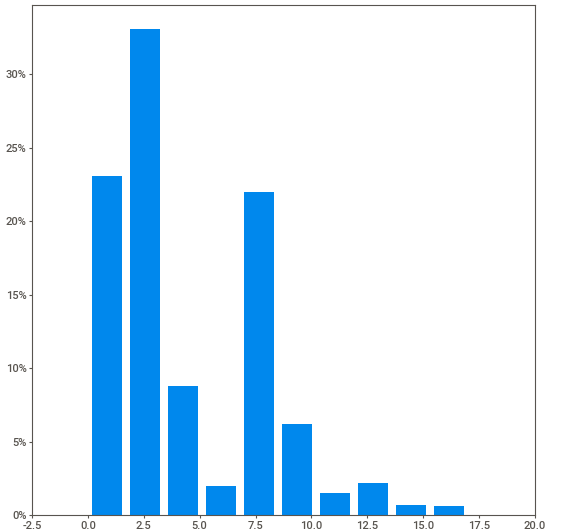
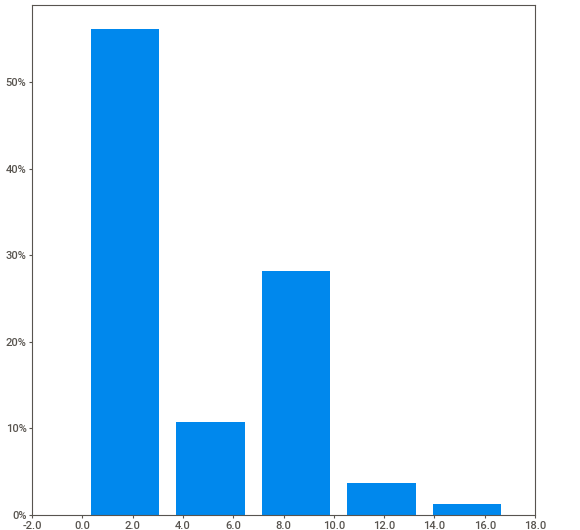
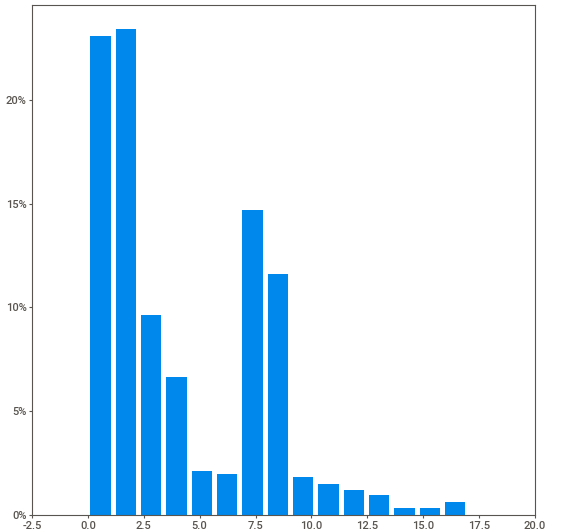
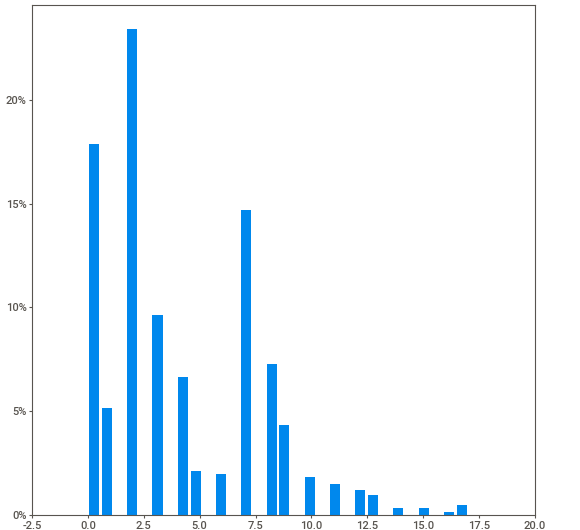
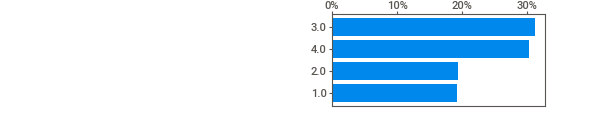
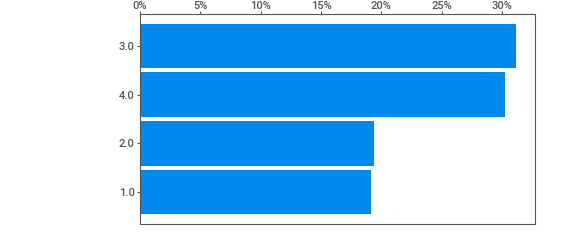
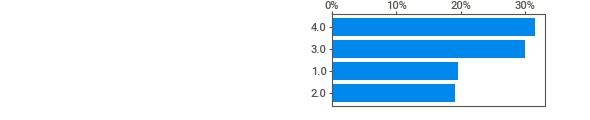
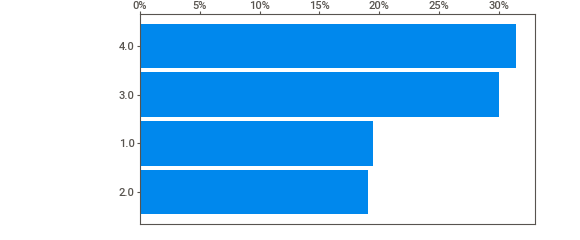
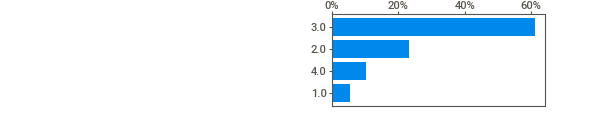
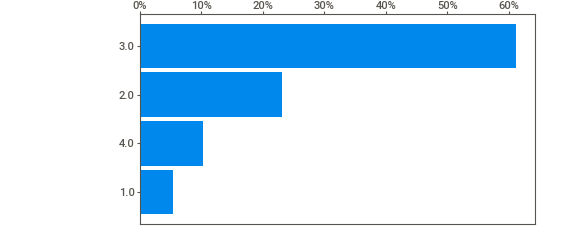
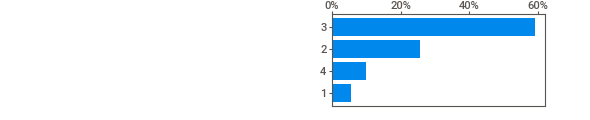
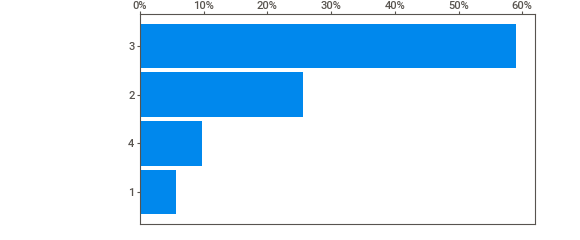
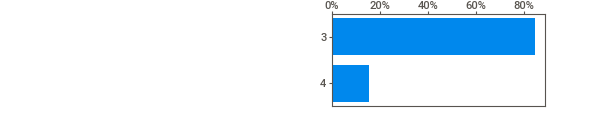
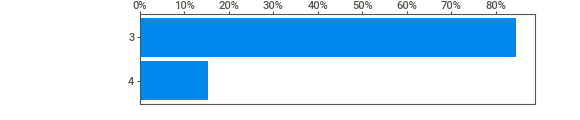
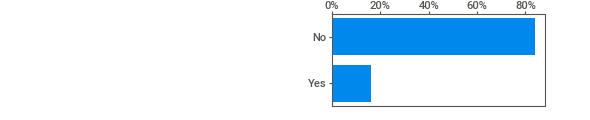
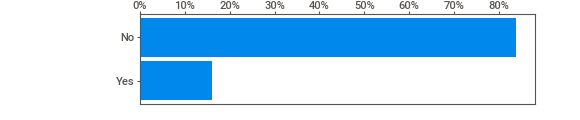
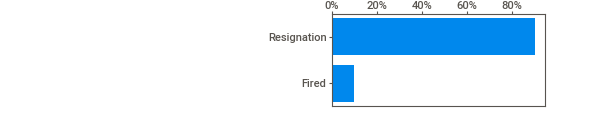
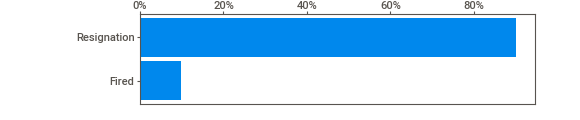
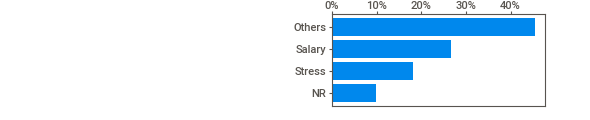
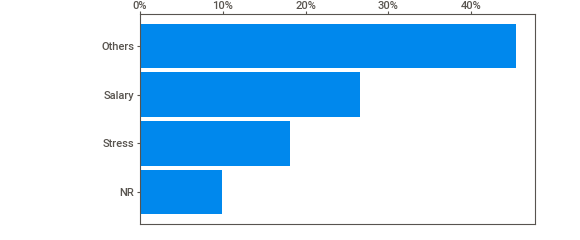
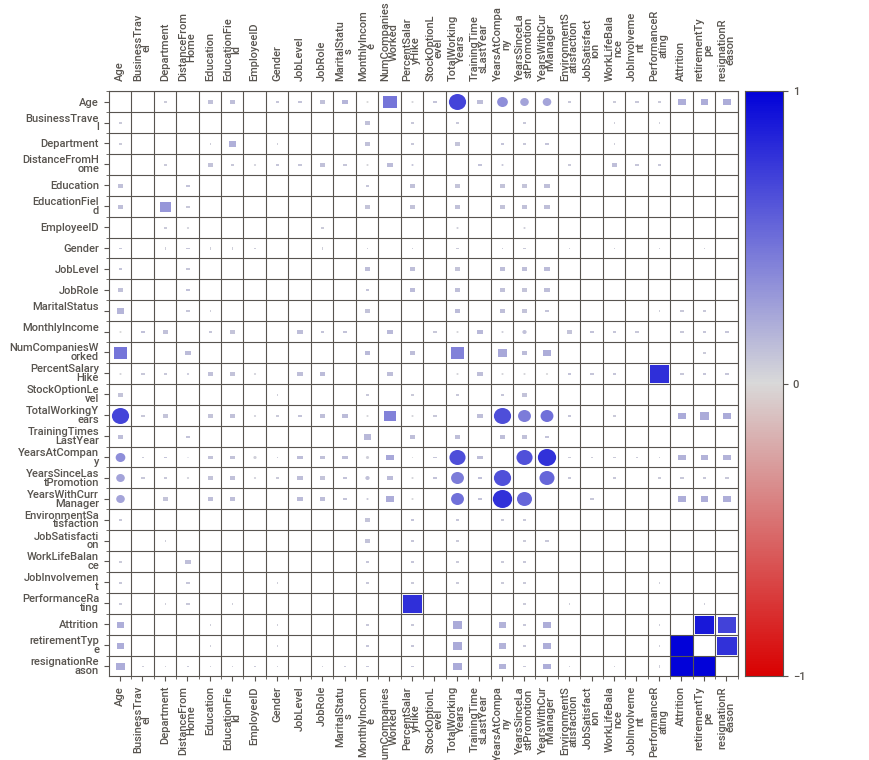
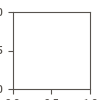

In [ ]:
rgd = sv.analyze(dfdata)
rgd.show_notebook()

In [ ]:
dfdata.describe()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.691837,15.209524,0.793878,11.260998,2.799320,7.008163,2.187755,4.123129,2.725170,2.734014,2.763492,2.729932,3.153741
std,9.133301,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.851883,7.785550,1.288978,6.125135,3.221699,3.567327,1.089852,1.102071,0.703541,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
dfdata.corr()

<ipython-input-218-c73bd8199543>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfdata.corr()


,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
Age,1.000000,0.006963,-0.035706,0.008649,-0.002884,-0.044314,0.298869,-0.033137,-0.031753,0.678999,-0.027308,0.311309,0.216513,0.202089,0.009699,-0.002712,-0.020524,0.018196,-0.025563
DistanceFromHome,0.006963,1.000000,-0.008638,-0.001097,-0.037329,-0.021607,-0.013514,0.038125,0.011169,0.009005,-0.009001,0.031684,0.002290,0.021584,0.020113,-0.011532,0.008305,-0.001837,0.036418
Education,-0.035706,-0.008638,1.000000,-0.009680,0.045746,0.006410,-0.016195,-0.040531,0.001261,-0.011431,0.010472,0.006080,0.022490,0.005358,-0.045636,-0.006259,-0.005610,-0.018279,-0.035591
EmployeeID,0.008649,-0.001097,-0.009680,1.000000,-0.003303,0.007338,-0.000789,-0.004456,-0.014254,-0.000302,-0.010191,0.004086,0.000256,0.008579,0.000455,-0.000924,-0.002164,0.008591,-0.006892
JobLevel,-0.002884,-0.037329,0.045746,-0.003303,1.000000,0.047316,-0.010116,0.010973,0.000993,-0.035763,-0.032500,-0.064219,-0.060811,-0.055251,-0.024540,-0.019896,-0.027763,-0.012630,-0.002474
MonthlyIncome,-0.044314,-0.021607,0.006410,0.007338,0.047316,1.000000,-0.020515,0.004325,0.026930,-0.033716,0.050112,0.000995,0.065219,0.024304,-0.005747,0.003461,0.003705,0.023346,0.016093
NumCompaniesWorked,0.298869,-0.013514,-0.016195,-0.000789,-0.010116,-0.020515,1.000000,0.031062,0.017282,0.237301,-0.032225,-0.117490,-0.036326,-0.109207,0.013060,-0.054586,-0.008844,0.027994,0.018135
PercentSalaryHike,-0.033137,0.038125,-0.040531,-0.004456,0.010973,0.004325,0.031062,1.000000,0.012548,-0.019364,-0.037392,-0.029707,-0.029542,-0.040864,0.000850,0.030078,-0.040305,-0.004658,0.773550
StockOptionLevel,-0.031753,0.011169,0.001261,-0.014254,0.000993,0.026930,0.017282,0.012548,1.000000,0.003052,-0.069902,0.007886,0.019063,0.017757,-0.004842,0.039431,-0.022701,0.010295,-0.036348
TotalWorkingYears,0.678999,0.009005,-0.011431,-0.000302,-0.035763,-0.033716,0.237301,-0.019364,0.003052,1.000000,-0.041654,0.625088,0.403635,0.457693,-0.002317,-0.016517,0.000547,0.007283,-0.001854


<ipython-input-219-436796299697>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfdata.corr())


<Axes: >

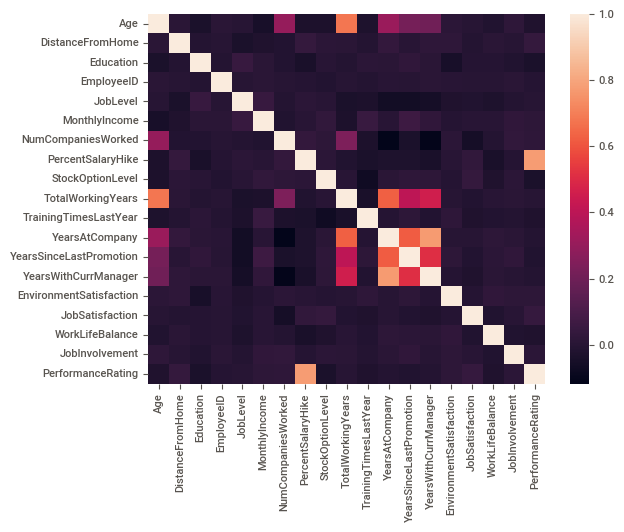

In [ ]:
sns.heatmap(dfdata.corr())

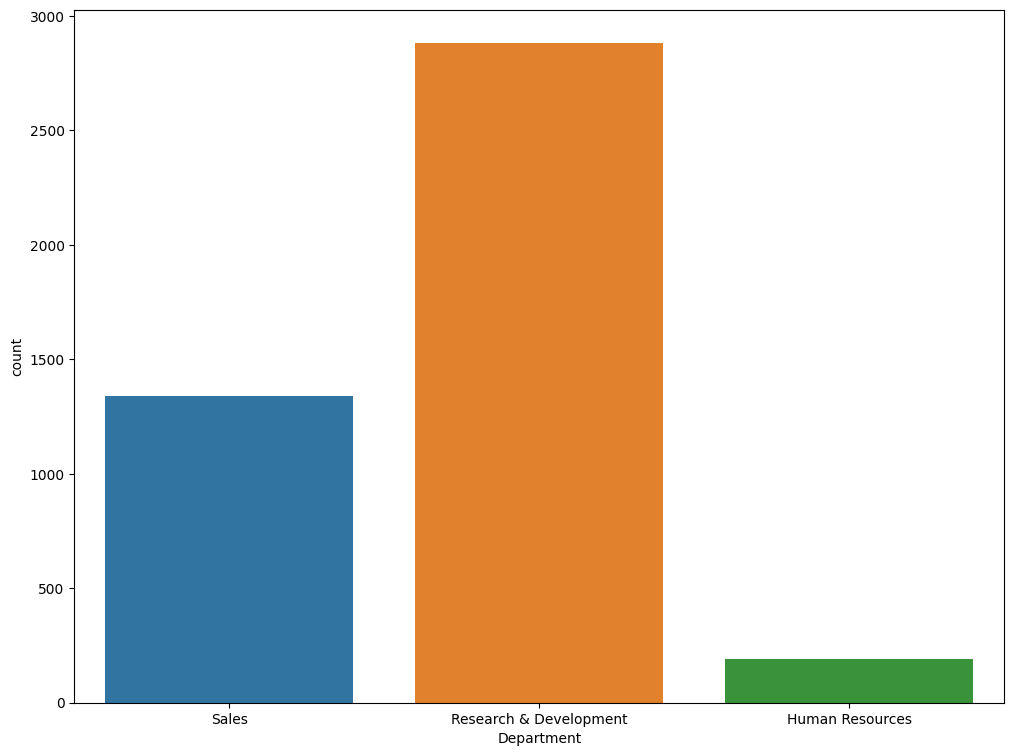

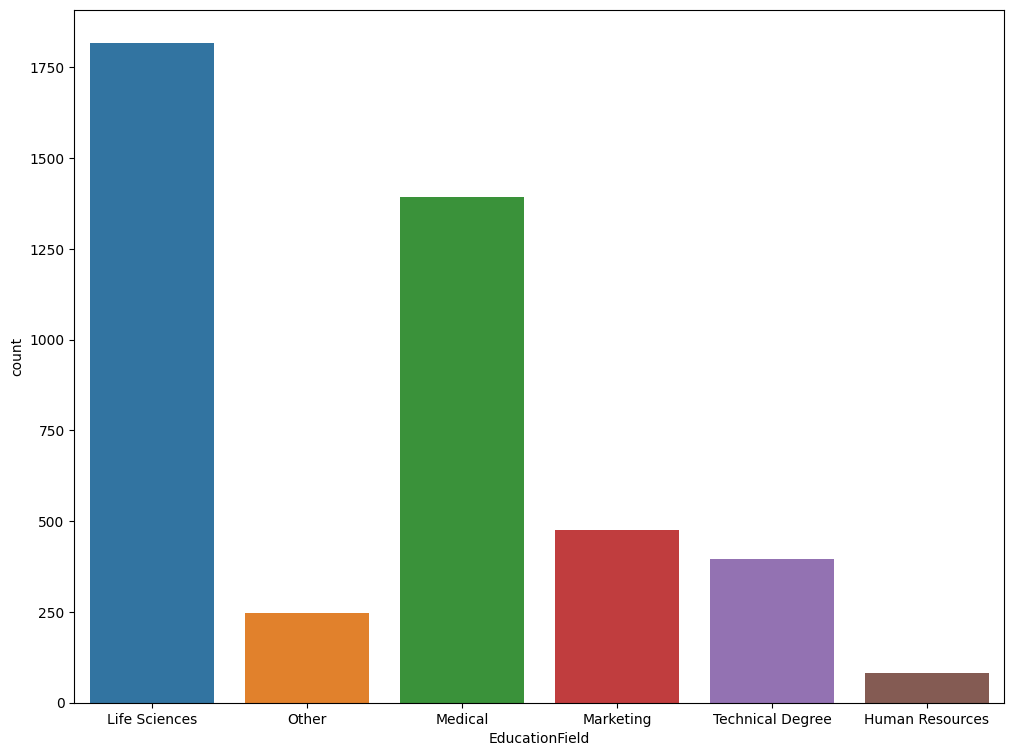

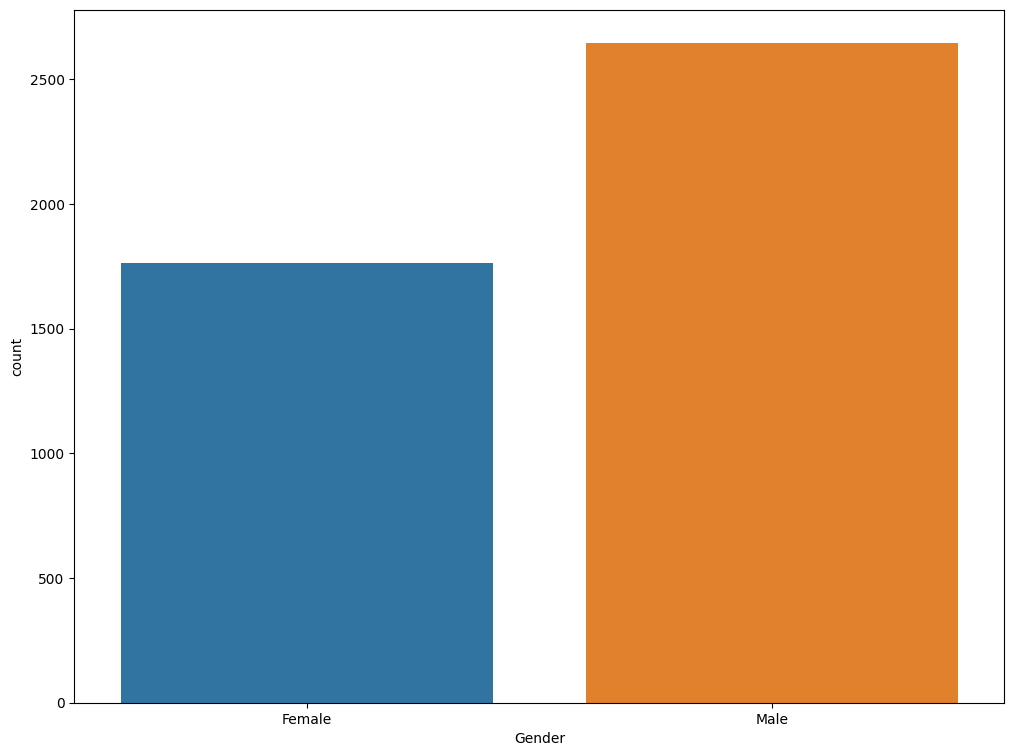

In [ ]:
#analizamos departamento, campo de educacion y el genero y ver como estan distribuidas
variables1 = dfdata[["Department","EducationField","Gender"]]
for i in variables1:
    plt.figure(figsize= (12,9))
    sns.countplot(x= variables1[i])

In [ ]:
#como podemos observar el departamento donde mas hay empleados es investigacion y desarrollo, y los campos de educacion son ciencas de la vida y medicina,
# asi como tambien podemos observar que hay mayor cantidad de empleados hombres

In [ ]:
#Anlizaremos como estan distribuidos los departamentos
base1= dfdata.groupby(["Department"])[["EmployeeID"]].count().sort_values('EmployeeID', ascending = False).reset_index()
empl = dfdata["EmployeeID"].count()

fig = px.pie(base1, values = 'EmployeeID',names="Department",hole= .5,
                color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    annotations = [dict(text = str(empl), x=0.5, y = 0.5, font_size = 40, showarrow = False )])
fig.show()

In [ ]:
#Como podemos confirmar mas del 60% de los empleados hacen parte del departamento de investigacion y desarrollo

<Axes: xlabel='Department', ylabel='count'>

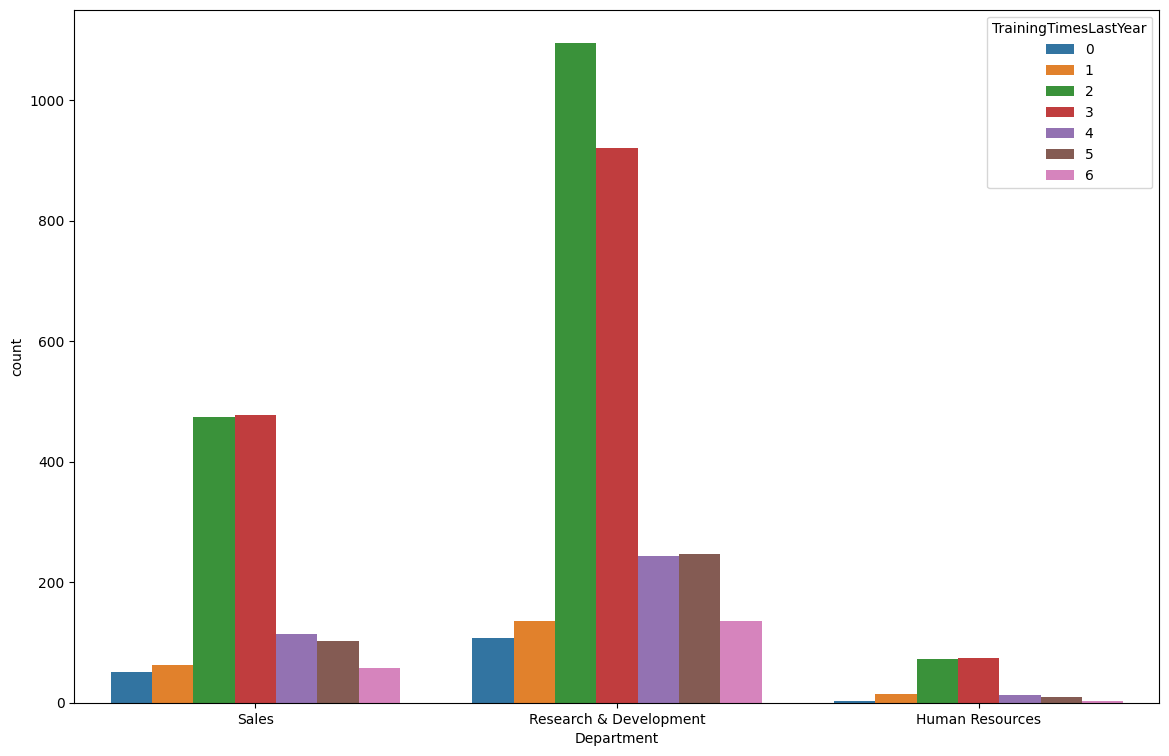

In [ ]:
#analizaremos el número de capacitaciones que se le da a los empleados que se encuentran en la empresa
plt.figure(figsize = (14,9))
sns.countplot(data=dfdata,x="Department",hue="TrainingTimesLastYear")

In [ ]:
#Como podemos observar el numero de capacitacion que se da a los empleados es de 2 o 3 por anio

<Axes: xlabel='JobInvolvement', ylabel='count'>

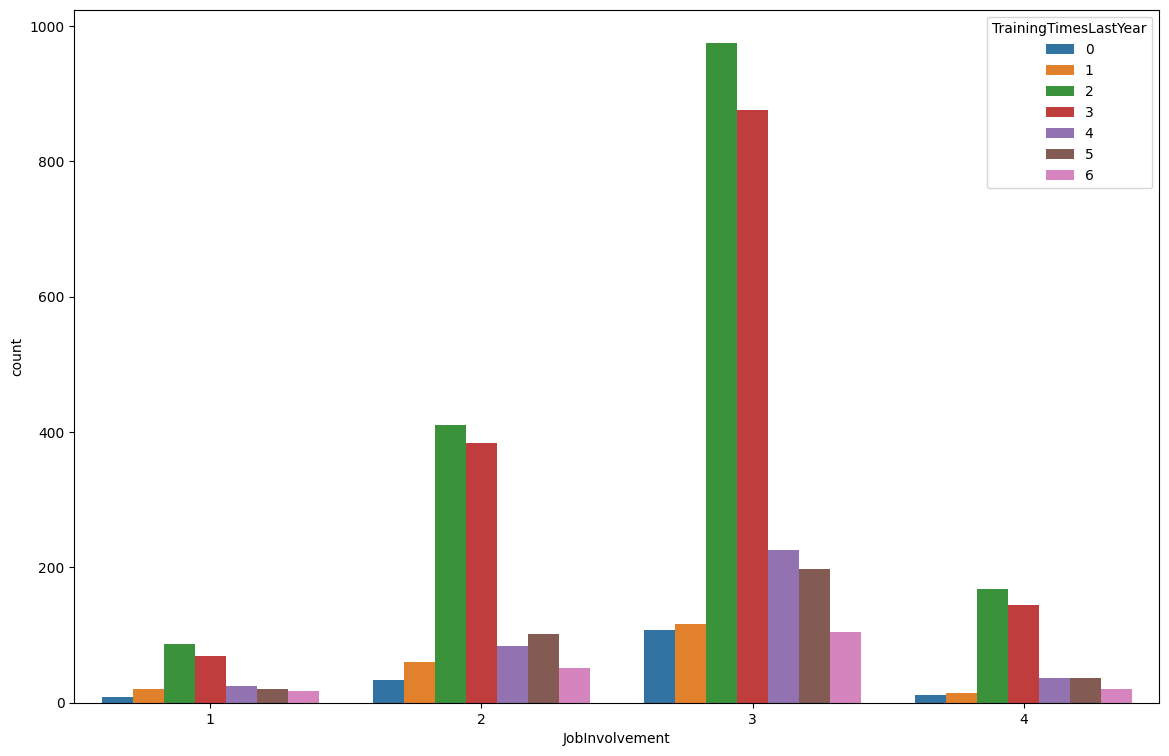

In [ ]:
#analizaremos si el nivel de participacion en el trabajo esta relacionado con las capacitaciones que se dan
plt.figure(figsize = (14,9))
sns.countplot(data=dfdata,x="JobInvolvement",hue="TrainingTimesLastYear")

<Axes: xlabel='JobLevel', ylabel='count'>

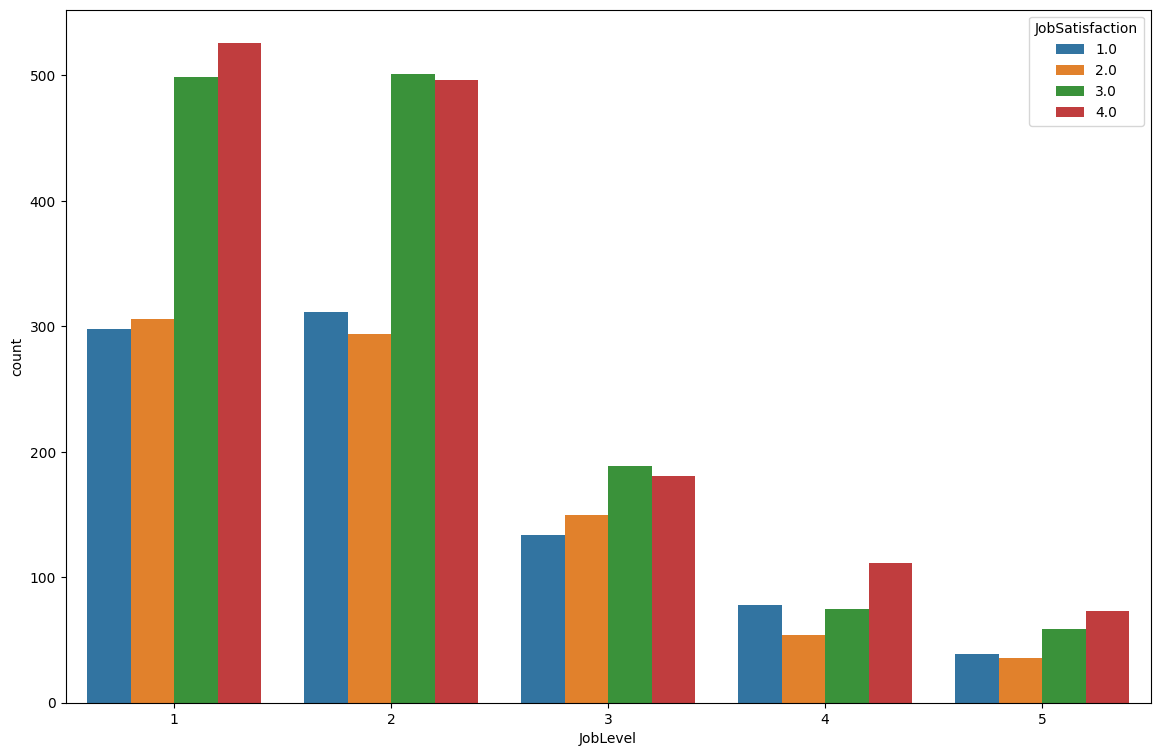

In [ ]:
#analizamos el nivel que tiene  el empleado en la empresa con el nivel de satisfaccion del empleado
plt.figure(figsize = (14,9))
sns.countplot(data=dfdata,x="JobLevel",hue="JobSatisfaction")

<Axes: xlabel='Department', ylabel='count'>

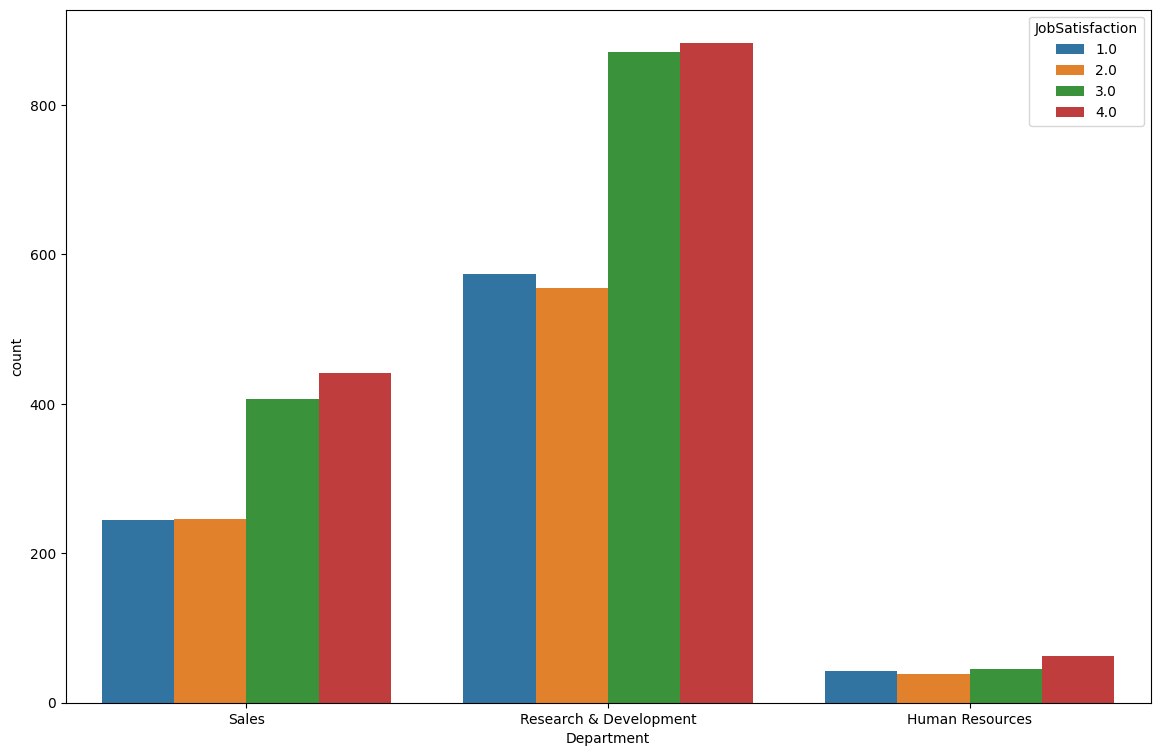

In [ ]:
#analizamos el nivel de satisfaccion con el departamento del que hace parte el empleado
plt.figure(figsize = (14,9))
sns.countplot(data=dfdata,x="Department",hue="JobSatisfaction")

In [ ]:
#Como podemos observar el nivel de satisfaccion de los empleados en todos los departamentos se encuentran satisfechos
# pero lo  que mas podemos resaltar es que hay una gran cantidad de empleados en todos los departamentos que no se encuentran satisfechos lo que nos muestra la gravedad del problema

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

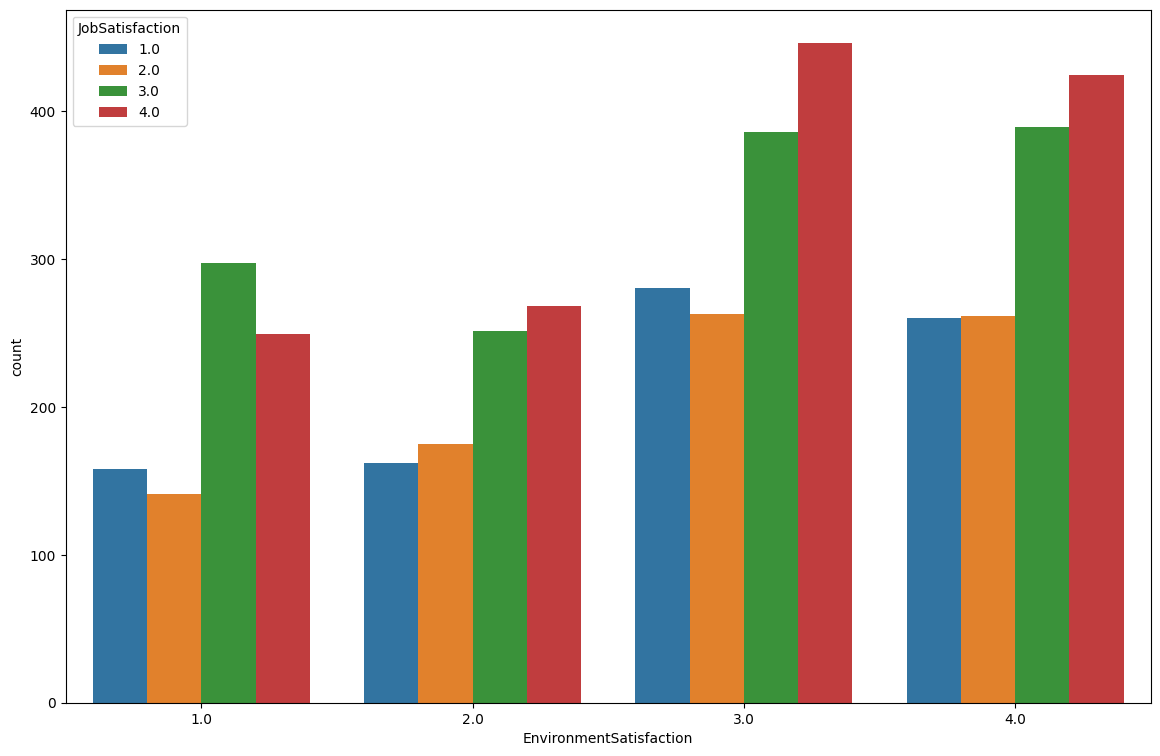

In [ ]:
#Analizamosel ambiente laboral de los empleados con su satisfaccion en el trabajo
plt.figure(figsize = (14,9))
sns.countplot(data=dfdata,x="EnvironmentSatisfaction",hue="JobSatisfaction")

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

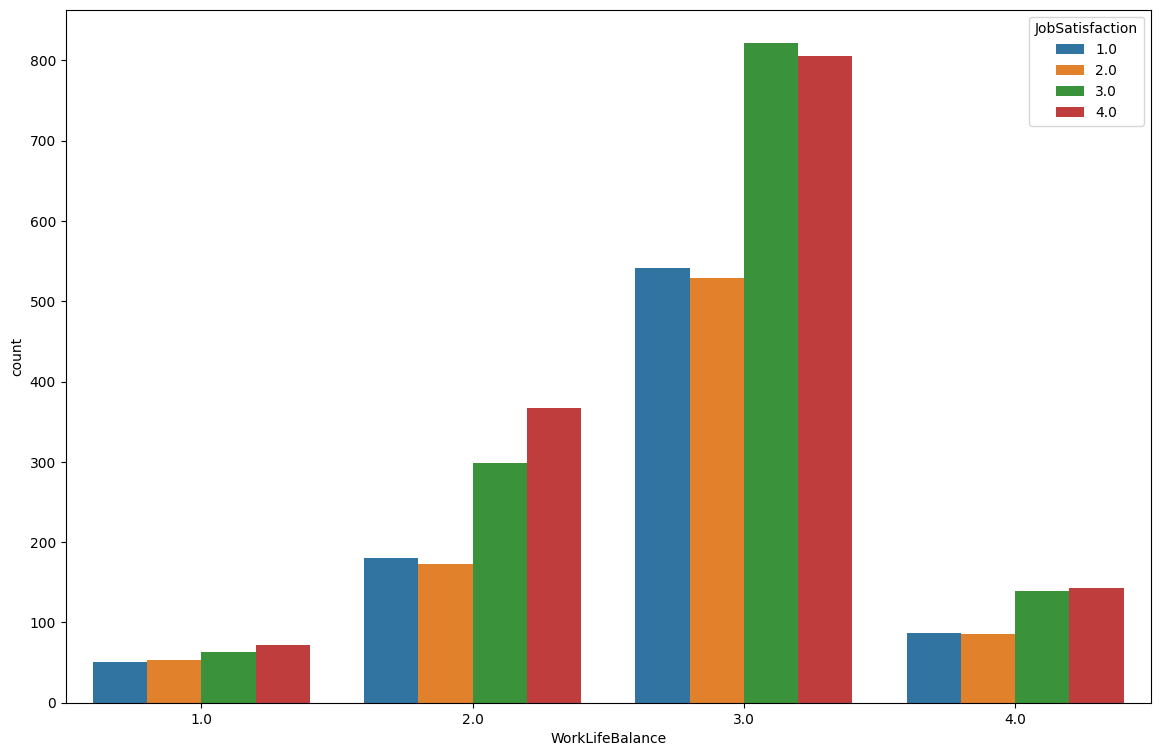

In [ ]:
plt.figure(figsize = (14,9))
sns.countplot(data=dfdata,x="WorkLifeBalance",hue="JobSatisfaction")

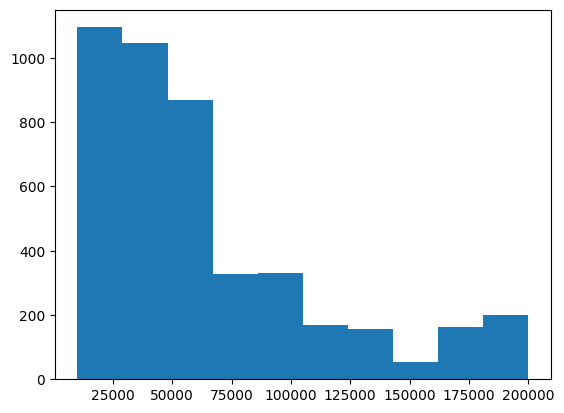

In [ ]:
plt.hist(dfdata['MonthlyIncome'])
plt.show()

In [ ]:
fig = px.histogram(dfdata, x="MonthlyIncome", color="Gender")
fig.show()

In [ ]:
#Relacion de distancia caasa/trabajo por el numero de numero de empleados
datos7=dfdata.groupby(['DistanceFromHome'])[['EmployeeID']].count().reset_index()
datos7.head()

,DistanceFromHome,EmployeeID
0,1,624
1,2,633
2,3,252
3,4,192
4,5,195


In [ ]:
fig= px.bar(datos7, x='DistanceFromHome', y='EmployeeID', color='DistanceFromHome',   title= '<b>Relación de cantidad de empleados por la distancia casa/trabajo <b>')
fig.update_layout(
    xaxis_title='Distancia casa/trabajo (Kms)',
    yaxis_title='cantidad de empleados',
    legend_title='DistanceFromHome',
    template= 'simple_white', #color del fondo
    title_x=0.5, #ubicacion del titulo

)

In [ ]:
# para nuestro analisis es mas facil observarlos de mayor a menor segun el total de años trabajados, asi que vamos a organizarlos con un pequeño data frame
datos8 = dfdata.loc[:, ['EmployeeID','TotalWorkingYears']]

#Agrupamos por el total de años trabajando
datos10=datos8.groupby(['TotalWorkingYears'])[['EmployeeID']].count().reset_index()
datos10.head()

,TotalWorkingYears,EmployeeID
0,0.0,33
1,1.0,242
2,2.0,102
3,3.0,126
4,4.0,189


In [ ]:
fig= px.bar(datos10, x='TotalWorkingYears', y='EmployeeID', color='TotalWorkingYears',   title= '<b>Distribución de años trabajados por numero de empleados <b>')
fig.update_layout(
    xaxis_title='Años trabajado',
    yaxis_title='Numero de trabajadores',
    legend_title='Años trabajado',
    template= 'simple_white', #color del fondo
    title_x=0.5, #ubicacion del titulo

)

In [ ]:
#Podemos observar que la mayoria de empleados lleva trabajando entre 5 y 10 Años trabajando y son pocos los empleados que llevan trabajando mas de 20 Años

In [ ]:
##Boxplot de las razones de retiro por departamento---> df retirados
fig = px.box(dfdata, x="resignationReason" , y='JobSatisfaction', color="Department")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
####boxplot relacion de lo que ganan mensualmente vs su motivo de retiro por nivel de trabajo
fig = px.box(dfdata, x="resignationReason" , y='MonthlyIncome', color="JobLevel")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
##Boxplo departamento vs nivel de satisfacion por genro df final
fig = px.box(dfdata, x='Department' , y="JobSatisfaction", color="Gender")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
#Aca podemos observar que los boxplots estan muy parejos el unico que tiene un bigote mas corto es la de human resources en el genero femenino esto puede deberse a que la carga de trabajo podria estar desequilibrada

In [ ]:
dfdata['retirementDate'] = pd.to_datetime(dfdata['retirementDate']) # Convertir la fecha en el formato correcto
dfdata["retirementDate"] = dfdata["retirementDate"].dt.month
retfecha= dfdata.groupby(["retirementDate"])[["EmployeeID"]].count().reset_index()
fig = px.line(retfecha, x='retirementDate', y =['EmployeeID'], title = '<b>Evolución de retiros de los empleados<b>',
              color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    legend_title = 'Despidos:',
    xaxis_title = '<b>Fecha<b>',
    yaxis_title = '<b>Cantidad de casos<b>',
)

fig.show()

<ipython-input-28-91f04e23cdb5>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



<Axes: >

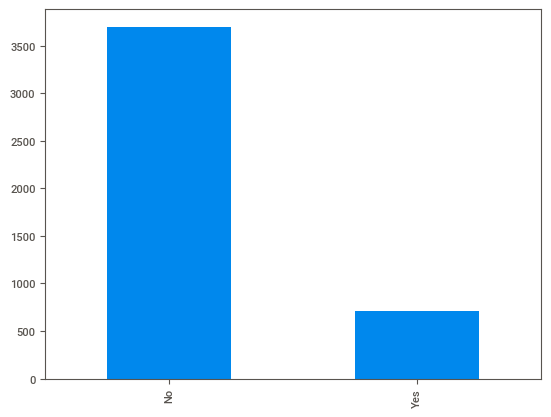

In [ ]:
dfdata['Attrition'].value_counts().plot(kind='bar')

##Preparar base para predecir

In [ ]:
dfdata.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition',
       'retirementDate', 'retirementType', 'resignationReason'],
      dtype='object')

In [ ]:
dfdata[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] = dfdata[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].astype(float)

In [ ]:
dfdata[['BusinessTravel', 'Department','Education', 'EducationField','Gender','JobLevel', 'JobRole', 'MaritalStatus','StockOptionLevel', 'EnvironmentSatisfaction',
                                     'JobSatisfaction', 'WorkLifeBalance','Attrition','retirementType',
       'resignationReason']]= dfdata[['BusinessTravel', 'Department','Education', 'EducationField','Gender','JobLevel', 'JobRole', 'MaritalStatus','StockOptionLevel', 'EnvironmentSatisfaction',
                                     'JobSatisfaction', 'WorkLifeBalance','Attrition','retirementType',
       'resignationReason']].astype(str)

In [ ]:
dfdata.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition',
       'retirementDate', 'retirementType', 'resignationReason'],
      dtype='object')

In [ ]:
dfdataret = dfdata[['EmployeeID','retirementDate']]
dfdataret

,EmployeeID,retirementDate
0,1,NaN
1,2,15/10/2016
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
4405,4406,NaN
4406,4407,NaN
4407,4408,NaN
4408,4409,NaN


In [ ]:
dfdata = dfdata[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
      'retirementType', 'resignationReason', 'Attrition']]

In [ ]:
df_dummys = pd.get_dummies(dfdata.iloc[:,:-1])
df_dummys.head()

,Age,DistanceFromHome,EmployeeID,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,WorkLifeBalance_3.0,WorkLifeBalance_4.0,retirementType_Fired,retirementType_Resignation,retirementType_nan,resignationReason_NR,resignationReason_Others,resignationReason_Salary,resignationReason_Stress,resignationReason_nan
0,51.0,6.0,1,131160.0,1.0,11.0,1.0,6.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,31.0,10.0,2,41890.0,0.0,23.0,6.0,3.0,5.0,1.0,...,0,1,0,1,0,0,1,0,0,0
2,32.0,17.0,3,193280.0,1.0,15.0,5.0,2.0,5.0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,38.0,2.0,4,83210.0,3.0,11.0,13.0,5.0,8.0,7.0,...,1,0,0,0,1,0,0,0,0,1
4,32.0,10.0,5,23420.0,4.0,12.0,9.0,2.0,6.0,0.0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
df_dummys.columns

Index(['Age', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'Jo

In [ ]:
# Separación de variables / caracteristicas
X = df_dummys
y = dfdata.iloc[:, -1].values # target

In [ ]:
# LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0:5])


[0 1 0 0 0]


In [ ]:
# Separación en conjuntos de entrenamiento y validación con 75% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 73)
Tamaño del conjunto de validación: (882, 73)


In [ ]:
#convertimos los datos estandarizados a df para meterlos al modelo
X_train_std_df = pd.DataFrame(X_train_std)


In [ ]:
X_train_std_df.columns= ['Age', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'StockOptionLevel_0',
       'StockOptionLevel_1', 'StockOptionLevel_2', 'StockOptionLevel_3',
       'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0',
       'EnvironmentSatisfaction_3.0', 'EnvironmentSatisfaction_4.0',
       'JobSatisfaction_1.0', 'JobSatisfaction_2.0', 'JobSatisfaction_3.0',
       'JobSatisfaction_4.0', 'WorkLifeBalance_1.0', 'WorkLifeBalance_2.0',
       'WorkLifeBalance_3.0', 'WorkLifeBalance_4.0', 'retirementType_Fired',
       'retirementType_Resignation', 'retirementType_nan',
       'resignationReason_NR', 'resignationReason_Others',
       'resignationReason_Salary', 'resignationReason_Stress',
       'resignationReason_nan']

In [ ]:
X_test_std_df = pd.DataFrame(X_test_std)

In [ ]:
X_test_std_df.columns=['Age', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'StockOptionLevel_0',
       'StockOptionLevel_1', 'StockOptionLevel_2', 'StockOptionLevel_3',
       'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0',
       'EnvironmentSatisfaction_3.0', 'EnvironmentSatisfaction_4.0',
       'JobSatisfaction_1.0', 'JobSatisfaction_2.0', 'JobSatisfaction_3.0',
       'JobSatisfaction_4.0', 'WorkLifeBalance_1.0', 'WorkLifeBalance_2.0',
       'WorkLifeBalance_3.0', 'WorkLifeBalance_4.0', 'retirementType_Fired',
       'retirementType_Resignation', 'retirementType_nan',
       'resignationReason_NR', 'resignationReason_Others',
       'resignationReason_Salary', 'resignationReason_Stress',
       'resignationReason_nan']

## Seleccion de variables

In [ ]:
#utilizamos metodos de seleccion de variables con el fin de disminuir el sobreajuste y solo modelar con 50 variables y no 73

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [ ]:
# Establecer Estimador
model = LogisticRegression(solver='liblinear')
# Obtener columnas seleciconadas
X_new = recursive_feature_selection(X, y, model, 50)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

Num Features: 50
Selected Features: [False False False False  True False  True  True  True  True  True  True
  True  True  True  True  True False False  True  True False False False
  True  True False  True  True  True False  True  True  True  True  True
  True False False False False  True  True  True  True False  True  True
  True  True False  True False  True False  True  True  True False False
  True  True  True  True False  True  True  True  True  True  True  True
  True]
Feature Ranking: [17 21 23 24  1  6  1  1  1  1  1  1  1  1  1  1  1 13 16  1  1  9  2 15
  1  1 14  1  1  1  4  1  1  1  1  1  1  8 22  3 19  1  1  1  1 11  1  1
  1  1 10  1 20  1 12  1  1  1  7 18  1  1  1  1  5  1  1  1  1  1  1  1
  1]


,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,...,WorkLifeBalance_2.0,WorkLifeBalance_3.0,retirementType_Fired,retirementType_Resignation,retirementType_nan,resignationReason_NR,resignationReason_Others,resignationReason_Salary,resignationReason_Stress,resignationReason_nan
0,1.0,1.0,6.0,1.0,0.0,0.0,3,3,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0.0,6.0,3.0,5.0,1.0,4.0,2,4,0,1,...,0,0,0,1,0,0,1,0,0,0
2,1.0,5.0,2.0,5.0,0.0,3.0,3,3,0,1,...,0,0,0,0,1,0,0,0,0,1
3,3.0,13.0,5.0,8.0,7.0,5.0,2,3,1,0,...,0,1,0,0,1,0,0,0,0,1
4,4.0,9.0,2.0,6.0,0.0,4.0,3,3,0,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
df_new.columns

Index(['NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Education_1', 'Education_2',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male', 'JobLevel_1',
       'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'StockOptionLevel_0', 'StockOptionLevel_2',
       'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_3.0',
       'EnvironmentSatisfaction_

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
standard_scaler = StandardScaler()
X_std = standard_scaler.fit_transform(X)

# Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.05), max_features=50)
sel_.fit(X_std, y)
print(sel_.estimator_.coef_)
#Obtener variables seleccionadas
X_new = sel_.get_support()

df_new = X.iloc[:,X_new]
df_new.head()

[-0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.         -0.          0.         -0.          0.
 -0.         -0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.          0.          0.
  0.         -0.31496781  0.          0.          0.          0.
 -0.00277008]


,retirementType_nan,resignationReason_nan
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1


In [ ]:
from sklearn.feature_selection import SelectKBest,  f_classif

# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [ ]:
# Obtener columnas seleciconadas -
X_new = select_kbest(X, y,  f_classif,50)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

Scores:
 [1.14631682e+02 4.17369754e-01 9.85853806e-02 4.28857038e+00
 7.81308263e+00 4.67023661e+00 1.31609555e+02 1.07968080e+01
 8.10784452e+01 4.81102093e+00 1.10236968e+02 1.07132817e+00
 2.41560201e+00 2.45736984e+01 5.92258389e+01 1.08438314e+01
 2.89439474e+01 1.03299381e+00 1.71860502e+00 2.92487558e-01
 5.53063590e+00 6.58232243e-01 3.58904752e-01 2.60660162e-01
 3.72765138e+01 6.77229297e-01 6.29940950e-02 2.56987898e-03
 2.97218669e+00 7.29454073e+00 1.44858537e+00 1.44858537e+00
 8.13903522e-01 5.17886983e+00 1.18303376e+00 1.81784968e-03
 1.52242840e+00 8.35668863e-01 8.46517382e-01 6.12947520e-03
 1.39681097e+00 9.25371574e+00 1.09417542e+01 3.32634238e+00
 5.20766108e-01 5.40565982e-01 3.41788228e+01 3.67941159e+01
 1.39947949e+02 1.12150160e+00 2.32188828e+00 1.00397279e+00
 1.37263696e-01 6.47003726e+01 1.07346566e+00 7.36619627e+00
 1.03613930e+01 3.66496751e+01 7.18742527e-02 2.59324542e-01
 3.47736918e+01 4.39178055e+01 4.25050295e-01 1.84201185e+01
 1.10561831e+00

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,Age,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,...,WorkLifeBalance_3.0,WorkLifeBalance_4.0,retirementType_Fired,retirementType_Resignation,retirementType_nan,resignationReason_NR,resignationReason_Others,resignationReason_Salary,resignationReason_Stress,resignationReason_nan
0,51.0,131160.0,1.0,11.0,1.0,6.0,1.0,0.0,0.0,3,...,0,0,0,0,1,0,0,0,0,1
1,31.0,41890.0,0.0,23.0,6.0,3.0,5.0,1.0,4.0,4,...,0,1,0,1,0,0,1,0,0,0
2,32.0,193280.0,1.0,15.0,5.0,2.0,5.0,0.0,3.0,3,...,0,0,0,0,1,0,0,0,0,1
3,38.0,83210.0,3.0,11.0,13.0,5.0,8.0,7.0,5.0,3,...,1,0,0,0,1,0,0,0,0,1
4,32.0,23420.0,4.0,12.0,9.0,2.0,6.0,0.0,4.0,3,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
df_new.columns

Index(['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Sales', 'Education_2', 'EducationField_Human Resources',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobLevel_2', 'JobLevel_3',
       'JobLevel_5', 'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'StockOptionLevel_0', 'StockOptionLevel_1',
       'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0',
       'EnvironmentSatisfaction_3.0', 'EnvironmentSatisfaction_4.0',
       'JobSati

In [ ]:
#como podemos observar los metodos de seleccion de variables nos dan variables muy similares por lo que se usaran las variables que incluyen los dos metodos

In [ ]:
columnas_T=['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Sales', 'Education_2', 'EducationField_Human Resources',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobLevel_2', 'JobLevel_3',
       'JobLevel_5', 'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'StockOptionLevel_0', 'StockOptionLevel_1',
       'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0',
       'EnvironmentSatisfaction_3.0', 'EnvironmentSatisfaction_4.0',
       'JobSatisfaction_1.0', 'JobSatisfaction_4.0', 'WorkLifeBalance_1.0',
       'WorkLifeBalance_3.0', 'WorkLifeBalance_4.0', 'retirementType_Fired',
       'retirementType_Resignation', 'retirementType_nan',
       'resignationReason_NR', 'resignationReason_Others',
       'resignationReason_Salary', 'resignationReason_Stress',
       'resignationReason_nan']

##Modelos

###Regresion Logistica

In [ ]:
#vamos a relizar un modelo balanceado
from sklearn.linear_model import LogisticRegression

# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std_df.loc[:,columnas_T], y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std_df.loc[:,columnas_T])
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std_df.loc[:,columnas_T],y_train)*100) + "%")
#print("Score: ", regr.score(X_train_std, y_pred))

Coeficientes:  [[-1.56096134e-01  9.21144115e-02 -7.18614494e-02 -1.70420455e-01
  -1.01008373e-01  1.02546071e-01  1.71540040e-01 -2.60683377e-01
   2.92104968e-05  4.13382241e-01 -1.61723308e-01  2.58272681e-01
   7.22559891e-02  1.37633007e-01 -8.69717764e-03  5.70138673e-02
   1.07446501e-01 -6.33160427e-02 -6.81795887e-02  4.77139468e-02
   1.21091416e-01  7.86241457e-02  3.70291759e-02 -6.79300826e-02
   7.54313861e-04 -1.29246200e-01  1.38916920e-01  8.18222786e-02
  -1.12235852e-01 -3.37336456e-02  3.14774861e-01  7.08647262e-02
   1.65709047e-02  2.63647654e-01 -8.15908451e-03 -7.20665543e-03
  -7.94765514e-02  2.57033694e-01 -1.19872454e-01  1.67581625e-01
  -9.33139046e-02  2.81209486e-02  1.28700343e+00  2.93259907e+00
  -4.05079713e+00  1.28700343e+00  1.24713090e+00  9.24829567e-01
   7.60638595e-01 -4.05079713e+00]]

Intercepto:  [0.32064358]
Accuracy (Train): 100.0%


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std_df.loc[:,columnas_T])
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std_df.loc[:,columnas_T],y_test)*100) + "%")

Accuracy (Test): 100.0%


###Arbol de decision

In [ ]:
treedf =tree.DecisionTreeClassifier(random_state=0)
treedf.fit(X_train_std_df.loc[:,columnas_T], y_train)
treedfpred=treedf.predict(X_test_std_df.loc[:,columnas_T])

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Train - classification report:\n", metrics.classification_report(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))
print ("Test - classification report :", metrics.classification_report(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 1.0
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      1.00      1.00       141

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882



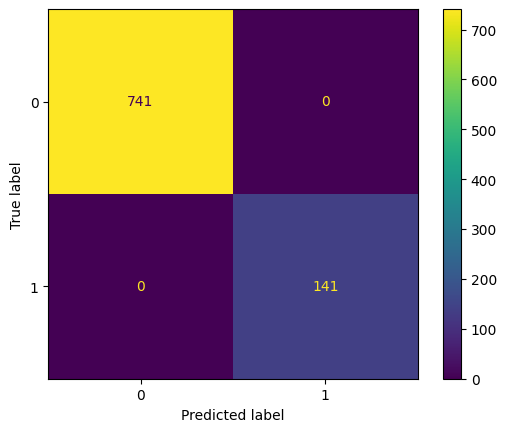

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [ ]:
param_grid = {
    "max_depth": [5,10,15,20,None],
    "min_samples_split": [5,10,15],
    "min_samples_leaf": [10,15]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(treedf, param_grid, scoring='f1', n_jobs=-1, cv=5).fit(X_train_std, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5}
1.0


In [ ]:
treedf =tree.DecisionTreeClassifier(criterion = 'gini',
          max_depth= 15, min_samples_leaf= 100, min_samples_split= 100,
          random_state=0)
treedf.fit(X_train_std_df.loc[:,columnas_T], y_train)
treedfpred=treedf.predict(X_test_std_df.loc[:,columnas_T])

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Train - classification report:\n", metrics.classification_report(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))
print ("Test - classification report :", metrics.classification_report(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 1.0
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      1.00      1.00       141

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882



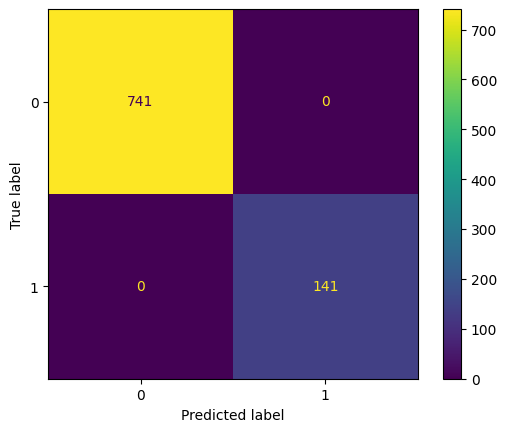

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
score='accuracy'
resultado = cross_val_score(treedf, X_train_std, y_train, cv=kfold, scoring=score,error_score='raise')
resultado2 = cross_val_score(treedf, X_test_std, y_test, cv=kfold, scoring=score,error_score='raise')
print('accuracy for train= ',resultado.mean()*100)
print('accuracy for test= ',resultado2.mean()*100)

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
score='accuracy'
resultado = cross_val_score(treedf, X_train_std_df.loc[:,columnas_T], y_train, cv=kfold, scoring=score,error_score='raise')
resultado2 = cross_val_score(treedf, X_test_std_df.loc[:,columnas_T],y_test, cv=kfold, scoring=score,error_score='raise')
print('accuracy for train= ',resultado.mean()*100)
print('accuracy for test= ',resultado2.mean()*100)

accuracy for train=  100.0
accuracy for test=  100.0


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Definición del modelo
ranfor = RandomForestClassifier(random_state = 123, n_estimators=100)
ranfor.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test)))
print ("Test - classification report :\n", metrics.classification_report(y_test, ranfor.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 1.0
Test - classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      1.00      1.00       141

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882



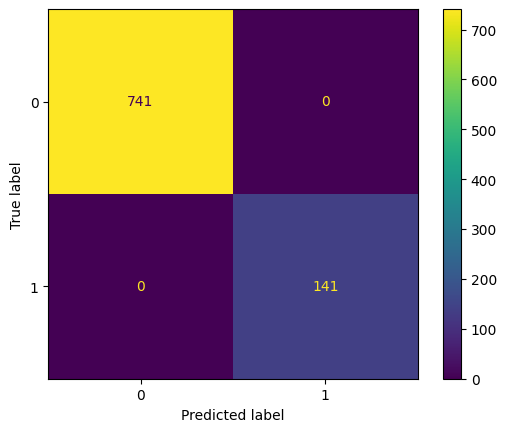

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, ranfor.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [ ]:
param_grid = {
    "max_depth": [5,15,20,30],
    "min_samples_split": [3,5,10],
    "min_samples_leaf": [2,3,5,10,],
    'n_estimators': [100,115,200,500]
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Definición del modelo
ranfor = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(ranfor, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best Score:  1.0


In [ ]:
ranfor = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = 5,
            min_samples_leaf = 2,
            min_samples_split = 3,
            random_state = 42
         )
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 1.0
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      1.00      1.00       141

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882



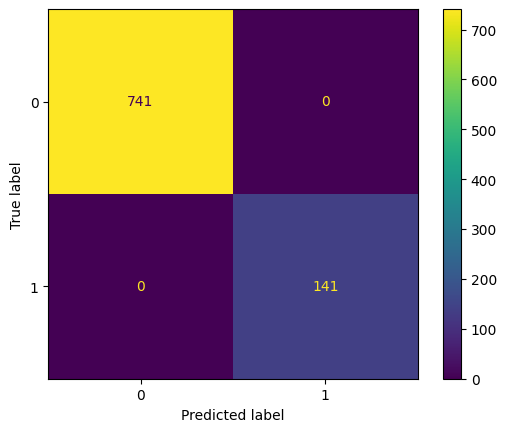

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, ranfor.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

##Seleccion de variables



In [ ]:
#Como podemos observar los modelos estan muy sobreajustados por lo que realizaremos un proceso de seleccion de variables con el fin de disminuir este sobreajuste

## Neural Networks